# <font color =blue> Regressão Linear </font> 
A. Amostragem? A depender do tamanho da base podemos usar algum tipo de amostragem. 

1. Carga da base 
2. Tratamento das Dummies 
3. Analise univariada 
4. Treino 60/70/40 
5. R.Lineaer 

#### <font color=green> Amostragem, 50% da base gerada </font>

In [89]:
#Fazendo a carga da Lib
import pandas as pd 
import numpy as np 
import seaborn as sb 
#plot
import matplotlib.pyplot as plt 

<font color=orange> <strong> nesta etapa vamos fazer uma amostragem estratitifcada, com objetivo de ter metade da base 
    </strong></font> 

In [118]:
smt = 2 #semente da amostra 
df_amostra = pd.read_csv('ABT.csv',sep=';')
df_amostra = df_amostra[df_amostra.ANO_CADASTRO == 2018]
df_amostra.shape

(252508, 39)

In [119]:
indices = np.arange(0,df_amostra.shape[0],smt)
df_amostra = df_amostra.iloc[indices]
df_amostra.shape, indices.shape #observando o tamanho da base 

((126254, 39), (126254,))

In [120]:
coraca = pd.read_csv('COR_FAM.rpt',sep = ';')
escolmaior = pd.read_csv('ENSINO_MAIOR18.rpt', sep = ';')
analf = pd.read_csv('ANALF2.rpt', sep = ';')
#-------------------------------------------------------------------------------------------
coraca = coraca.rename(columns={'ID_FAM':'ID_FAMILIA'})
escolmaior = escolmaior.drop(columns = ['Unnamed: 2'])
escolmaior = escolmaior.rename(columns={'id_familia':'ID_FAMILIA',
                                        'ensino': 'ENSINO'})
analf = analf.rename(columns={'id_familia':'ID_FAMILIA'}) 
#-------------------------------------------------------------------------------------------
df_amostra =   pd.merge(df_amostra,coraca, how='left',
                       left_on='ID_FAMILIA',
                       right_on='ID_FAMILIA') 
#-------------------------------------------------------------------------------------------
df_amostra = pd.merge(df_amostra, escolmaior, how='left',
                           left_on='ID_FAMILIA',
                           right_on='ID_FAMILIA'
                           )
df_amostra = pd.merge(df_amostra, analf, how='left',
                           left_on='ID_FAMILIA',
                           right_on='ID_FAMILIA'
                           )

In [121]:
df_amostra.head(1)

,IBGE,ANO_CADASTRO,ID_FAMILIA,SEXO_RESP,UF,MUNICIPIO,MESORREGIAO,VL_MED_FAM,LOCAL_DOM_FAM,ESPEC_DOM_FAM,...,RENDA_12MESES_REG,RENDA_APOSENTADORIA,RENDAS_DIVERSAS,PERIODO_MAX_TRAB_MEMB,VL_MENOR,MEDIA_IDADE,TM_BF,cor,ENSINO,ANALFABETO2
0,2100055,2018,3229159,M,Maranhão,Açailândia,Oeste Maranhense,0,Rural,Coletivo,...,0,0,0,NaN,0,32,1,Preta,3.Fundamental(incluialfabetização),N


Vamos avaliar os missings e criar uma base somente com o que vamos trabalhar 

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.6000e+04, 7.0049e+04, 2.0960e+03, 1.1300e+02, 7.0000e+00,
        6.0000e+00, 6.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

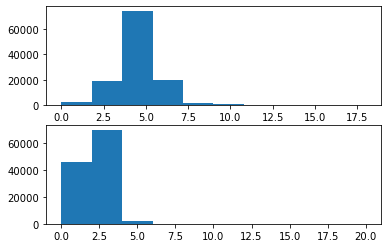

In [122]:
fig,(aux1, aux2) = plt.subplots(2,1)#figsize=(10,10))
aux1.hist(df_amostra['QTD_COMODO_DOMIC_FAM'])
aux2.hist(df_amostra['QTD_DORM_FAM'])

In [123]:
df_amostra['QTD_COMODO_DOMIC_FAM'].describe(),df_amostra['QTD_DORM_FAM'].describe()

(count    118267.000000
 mean          4.602518
 std           1.395803
 min           0.000000
 25%           4.000000
 50%           5.000000
 75%           5.000000
 max          18.000000
 Name: QTD_COMODO_DOMIC_FAM, dtype: float64,
 count    118279.000000
 mean          1.773138
 std           0.760368
 min           0.000000
 25%           1.000000
 50%           2.000000
 75%           2.000000
 max          20.000000
 Name: QTD_DORM_FAM, dtype: float64)

In [124]:
#df_amostra['ENSINO'] = df_amostra['ENSINO'].fillna('Não identificado')
df_amostra['PERIODO_MAX_TRAB_MEMB'] = df_amostra['PERIODO_MAX_TRAB_MEMB'].fillna(0)
df_amostra['QTD_COMODO_DOMIC_FAM'] = df_amostra['QTD_COMODO_DOMIC_FAM'].fillna(5)
df_amostra['QTD_DORM_FAM'] = df_amostra['QTD_DORM_FAM'].fillna(2)
df_amostra['ENSINO'] = df_amostra['ENSINO'].fillna('NAO INFORMADO')
df_amostra = df_amostra.rename(columns={' cor':'COR'})
df_amostra.isnull().sum()

IBGE                     0
ANO_CADASTRO             0
ID_FAMILIA               0
SEXO_RESP                0
UF                       0
MUNICIPIO                0
MESORREGIAO              0
VL_MED_FAM               0
LOCAL_DOM_FAM            0
ESPEC_DOM_FAM            0
QTD_COMODO_DOMIC_FAM     0
QTD_DORM_FAM             0
MAT_PISO_FAMILIA         0
MATERIA_CONSTRUCAO       0
AGUA_ENCANADA            0
ABASTECIMENTO            0
TEM_BANHEIRO             0
ESCOAMENTO_SANITARIO     0
DESTINO_LIXO             0
ILUMINACAO               0
CALCAMENTO               0
FAMILIA                  0
CLASSE_CIDADE            0
QTD_PESSOA               0
QTD_MASC                 0
QTD_FEM                  0
QTD_MENOR18              0
TEM_DEFICIENTE           0
TEM_ANALFABETO           0
ENSINO_SUPERIOR          0
MENOR_ESTUDA             0
RENDA_PROV_TRAB_REG      0
RENDA_12MESES_REG        0
RENDA_APOSENTADORIA      0
RENDAS_DIVERSAS          0
PERIODO_MAX_TRAB_MEMB    0
VL_MENOR                 0
M

In [125]:
df_amostra.dtypes

IBGE                       int64
ANO_CADASTRO               int64
ID_FAMILIA                 int64
SEXO_RESP                 object
UF                        object
MUNICIPIO                 object
MESORREGIAO               object
VL_MED_FAM                 int64
LOCAL_DOM_FAM             object
ESPEC_DOM_FAM             object
QTD_COMODO_DOMIC_FAM     float64
QTD_DORM_FAM             float64
MAT_PISO_FAMILIA          object
MATERIA_CONSTRUCAO        object
AGUA_ENCANADA             object
ABASTECIMENTO             object
TEM_BANHEIRO              object
ESCOAMENTO_SANITARIO      object
DESTINO_LIXO              object
ILUMINACAO                object
CALCAMENTO                object
FAMILIA                   object
CLASSE_CIDADE             object
QTD_PESSOA                 int64
QTD_MASC                   int64
QTD_FEM                    int64
QTD_MENOR18                int64
TEM_DEFICIENTE            object
TEM_ANALFABETO            object
ENSINO_SUPERIOR           object
MENOR_ESTU

In [126]:
df_amostra.describe()

,IBGE,ANO_CADASTRO,ID_FAMILIA,VL_MED_FAM,QTD_COMODO_DOMIC_FAM,QTD_DORM_FAM,QTD_PESSOA,QTD_MASC,QTD_FEM,QTD_MENOR18,RENDA_PROV_TRAB_REG,RENDA_12MESES_REG,RENDA_APOSENTADORIA,RENDAS_DIVERSAS,PERIODO_MAX_TRAB_MEMB,VL_MENOR,MEDIA_IDADE,TM_BF
count,1.262540e+05,126254.0,1.262540e+05,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000
mean,2.550804e+06,2018.0,2.789026e+06,364.047610,4.627663,1.787468,1.866935,0.846682,1.014637,0.516475,242.599347,2389.313915,345.832045,35.886277,3.931028,4.883188,36.466504,0.425381
std,2.834624e+05,0.0,1.436420e+06,400.257416,1.354392,0.738028,1.035058,0.738012,0.812569,0.811752,493.239589,5066.927358,568.339796,118.307224,5.090916,136.644154,19.846398,0.494403
min,2.100055e+06,2018.0,5.090000e+02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,2.304400e+06,2018.0,1.675999e+06,45.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
50%,2.604106e+06,2018.0,2.899374e+06,183.000000,5.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
75%,2.807105e+06,2018.0,4.130308e+06,636.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,250.000000,1800.000000,954.000000,0.000000,10.000000,0.000000,52.000000,1.000000
max,2.933604e+06,2018.0,4.950882e+06,2862.000000,18.000000,20.000000,13.000000,7.000000,8.000000,10.000000,26380.000000,96000.000000,3816.000000,2731.000000,12.000000,13000.000000,110.000000,1.000000


In [115]:
df_amostra['Valor'] = (df_amostra.RENDA_PROV_TRAB_REG + df_amostra.RENDAS_DIVERSAS + df_amostra.VL_MENOR) / df_amostra.QTD_PESSOA

In [100]:
df_amostra.describe()

,IBGE,ANO_CADASTRO,ID_FAMILIA,VL_MED_FAM,QTD_COMODO_DOMIC_FAM,QTD_DORM_FAM,QTD_PESSOA,QTD_MASC,QTD_FEM,QTD_MENOR18,RENDA_PROV_TRAB_REG,RENDA_12MESES_REG,RENDA_APOSENTADORIA,RENDAS_DIVERSAS,PERIODO_MAX_TRAB_MEMB,VL_MENOR,MEDIA_IDADE,TM_BF,Valor
count,1.262540e+05,126254.0,1.262540e+05,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000,126254.000000
mean,2.550804e+06,2018.0,2.789026e+06,364.047610,4.627663,1.787468,1.866935,0.846682,1.014637,0.516475,242.599347,2389.313915,345.832045,35.886277,3.931028,4.883188,36.466504,0.425381,155.216181
std,2.834624e+05,0.0,1.436420e+06,400.257416,1.354392,0.738028,1.035058,0.738012,0.812569,0.811752,493.239589,5066.927358,568.339796,118.307224,5.090916,136.644154,19.846398,0.494403,298.607953
min,2.100055e+06,2018.0,5.090000e+02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,2.304400e+06,2018.0,1.675999e+06,45.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
50%,2.604106e+06,2018.0,2.899374e+06,183.000000,5.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,50.000000
75%,2.807105e+06,2018.0,4.130308e+06,636.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,250.000000,1800.000000,954.000000,0.000000,10.000000,0.000000,52.000000,1.000000,200.000000
max,2.933604e+06,2018.0,4.950882e+06,2862.000000,18.000000,20.000000,13.000000,7.000000,8.000000,10.000000,26380.000000,96000.000000,3816.000000,2731.000000,12.000000,13000.000000,110.000000,1.000000,26380.000000


In [116]:
df_amostra[['VL_MED_FAM', 'QTD_PESSOA','Valor','RENDA_PROV_TRAB_REG','RENDA_APOSENTADORIA','RENDAS_DIVERSAS','VL_MENOR']].head(500)

,VL_MED_FAM,QTD_PESSOA,Valor,RENDA_PROV_TRAB_REG,RENDA_APOSENTADORIA,RENDAS_DIVERSAS,VL_MENOR
0,0,1,0.0,0,0,0,0
1,0,4,0.0,0,0,0,0
2,0,1,0.0,0,0,0,0
3,0,2,0.0,0,0,0,0
4,100,5,100.0,0,0,500,0
...,...,...,...,...,...,...,...
495,954,1,0.0,0,954,0,0
496,954,1,0.0,0,954,0,0
497,954,1,0.0,0,954,0,0
498,954,1,0.0,0,954,0,0


In [102]:
df_amostra[['IBGE',
'ANO_CADASTRO',
'ID_FAMILIA',
'VL_MED_FAM',
'QTD_COMODO_DOMIC_FAM',
'QTD_DORM_FAM',
'QTD_PESSOA', 
'QTD_MASC',
'QTD_FEM', 
'QTD_MENOR18', 
'RENDA_PROV_TRAB_REG', 
'RENDA_12MESES_REG',
'RENDA_APOSENTADORIA', 
'RENDAS_DIVERSAS',
'PERIODO_MAX_TRAB_MEMB', 
'VL_MENOR', 
'MEDIA_IDADE', 
'TM_BF']].to_csv('BOXPLOT',sep = ';')

### <font color=blue> Some function </font>

In [53]:
aux = []
def showBar(column):
    sub, (aux1) = plt.subplots(1,1,figsize=(5,5))
    x = df_amostra[column].unique()
    y = []
    for i in x:
        apend_ = df_amostra[df_amostra.loc[:,column] == i].count()
        y.append(apend_[[column]].tolist()[0])
        
    xtl = np.arange(len(x))
    aux = aux1.bar(x, y, 0.50, color='#6BD9DB')
    graph = aux 
    for rect in aux:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    #plt.savefig(f'Analises/{column}_UNIVARIADO.pdf', format='pdf')       

In [54]:
import matplotlib.pyplot as plt 
import pandas.plotting  as pltplot
def tableVarUni(column):
    bvd = pd.DataFrame(columns=['Classe','Qt','%'])
    bvd['Classe'] = df_amostra[column].unique().tolist()
    y = []
    y1 = []
    for i in bvd['Classe'].unique().tolist():
        apend_ = df_amostra[(df_amostra.loc[:,column] == i)].count()
        y.append(apend_[[column]].tolist()[0])
    bvd['Qt'] = y
    bvd['%'] = bvd.Qt/bvd.Qt.sum()
    bvd = bvd.sort_values(by=['%']) 
    return bvd

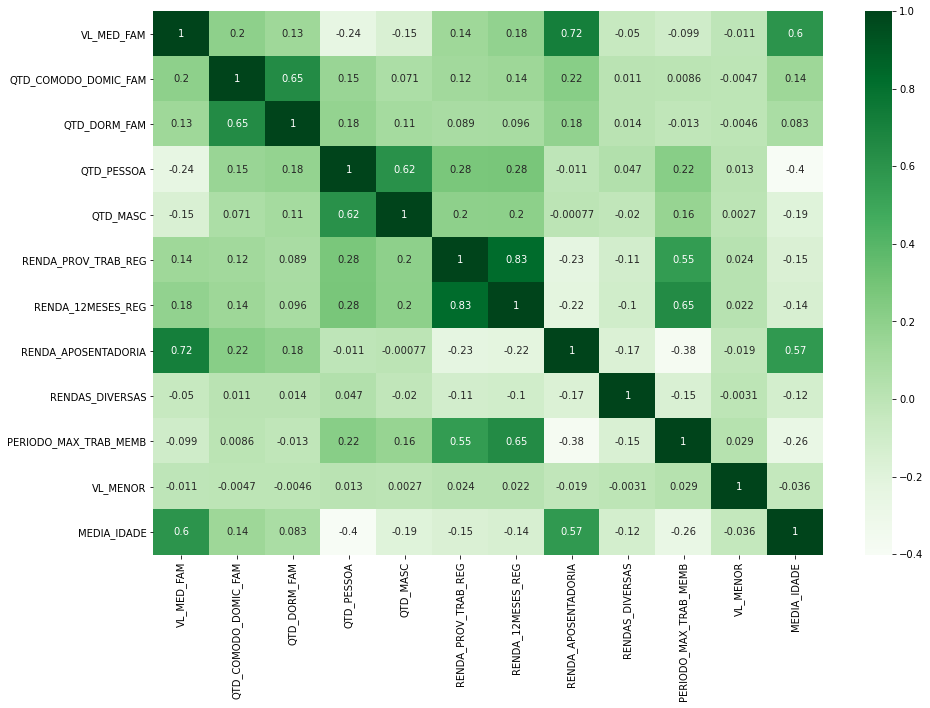

In [55]:
import seaborn as sn
correl_ = df_amostra[['VL_MED_FAM', 
                      'QTD_COMODO_DOMIC_FAM',
                      'QTD_DORM_FAM',
                      'QTD_PESSOA',
                      'QTD_MASC',
                      #'QTD_FEM', #-- por quantidade pessoa, creio que explica melhor o valor da target 
                      #'QTD_MENOR18', #-- por quantidade de pessoa, nesse caso creio que pessoa explica melhor a target 
                      'RENDA_PROV_TRAB_REG'
                      ,'RENDA_12MESES_REG' #
                      ,'RENDA_APOSENTADORIA' #-- por valor medio familia, creio que justifica melhor o valor da target
                      ,'RENDAS_DIVERSAS'
                      ,'PERIODO_MAX_TRAB_MEMB'
                      ,'VL_MENOR'
                      ,'MEDIA_IDADE']].corr()
plt.subplots(figsize=(15,10), nrows = 1 )
sn.heatmap(correl_, annot=True, cmap = 'Greens')

In [56]:
df_amostra.head()

,IBGE,ANO_CADASTRO,ID_FAMILIA,SEXO_RESP,UF,MUNICIPIO,MESORREGIAO,VL_MED_FAM,LOCAL_DOM_FAM,ESPEC_DOM_FAM,...,RENDA_APOSENTADORIA,RENDAS_DIVERSAS,PERIODO_MAX_TRAB_MEMB,VL_MENOR,MEDIA_IDADE,TM_BF,COR,ENSINO,ANALFABETO2,Valor
0,2100055,2018,3229159,M,Maranhão,Açailândia,MES3,0,Rural,Coletivo,...,0,0,0.0,0,32,1,Preta,3.Fundamental(incluialfabetização),N,0.0
1,2100055,2018,845959,F,Maranhão,Açailândia,MES3,0,Urbana,Particular Permanente,...,0,0,0.0,0,27,0,Parda,3.Fundamental(incluialfabetização),N,0.0
2,2100055,2018,3231367,F,Maranhão,Açailândia,MES3,0,Urbana,Particular Permanente,...,0,0,0.0,0,35,1,Parda,4.Nenhum,S,0.0
3,2100055,2018,864328,F,Maranhão,Açailândia,MES3,0,Urbana,Particular Permanente,...,0,0,0.0,0,10,1,Parda,2.Medio,N,0.0
4,2100055,2018,3230274,M,Maranhão,Açailândia,MES3,100,Urbana,Particular Permanente,...,0,500,0.0,0,21,1,Mais de uma,3.Fundamental(incluialfabetização),N,100.0


In [57]:
df_amostra.nunique()


IBGE                       1789
ANO_CADASTRO                  1
ID_FAMILIA               126254
SEXO_RESP                     2
UF                            9
MUNICIPIO                  1723
MESORREGIAO                   8
VL_MED_FAM                 1523
LOCAL_DOM_FAM                 2
ESPEC_DOM_FAM                 3
QTD_COMODO_DOMIC_FAM         18
QTD_DORM_FAM                 15
MAT_PISO_FAMILIA              7
MATERIA_CONSTRUCAO            8
AGUA_ENCANADA                 2
ABASTECIMENTO                 5
TEM_BANHEIRO                  2
ESCOAMENTO_SANITARIO          7
DESTINO_LIXO                  7
ILUMINACAO                    7
CALCAMENTO                    3
FAMILIA                      13
CLASSE_CIDADE                 3
QTD_PESSOA                   13
QTD_MASC                      8
QTD_FEM                       9
QTD_MENOR18                  11
TEM_DEFICIENTE                2
TEM_ANALFABETO                2
ENSINO_SUPERIOR               1
MENOR_ESTUDA                  5
RENDA_PR

# <font color=green> SEXO_RESP </font>

  Classe     Qt         %
0      M  41890  0.331791
1      F  84364  0.668209


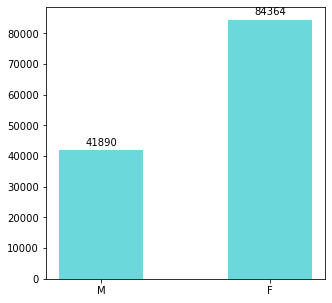

In [58]:
#df_amostra.MESORREGIAO = df_amostra['MESO2']
bvdanalise = showBar('SEXO_RESP') 
bvduni = tableVarUni('SEXO_RESP')
#df_amostra['MESO2'] = df_amostra.MESORREGIAO
print(bvduni)

### <font color=green> MESORREGIAO</font>

  Classe     Qt         %
2   MES1   8413  0.066636
5   MES8   9660  0.076512
7   MES4  11985  0.094928
4   MES6  13670  0.108274
1   MES7  15688  0.124257
6   MES5  16804  0.133097
3   MES2  21707  0.171931
0   MES3  28327  0.224365


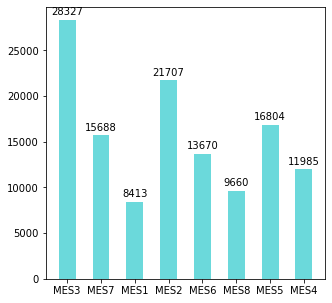

In [59]:
replace_ =  {'Sertão Sergipano':'MES1',
          'Borborema':'MES1',
     'Sul Maranhense':'MES1',
   'Central Potiguar':'MES1',
    'Sertão Alagoano':'MES1',
'Centro-Sul Cearense':'MES1',
   'Agreste Potiguar':'MES1',
          'Jaguaribe':'MES1',
   'Agreste Alagoano':'MES1',
  'Sudeste Piauiense':'MES1',
 'Sudoeste Piauiense':'MES2',
'São Francisco Pernambucano':'MES2',
    'Norte Piauiense':'MES2',
'Extremo Oeste Baiano':'MES2',
   'Agreste Sergipano':'MES2',
   'Centro Maranhense':'MES2',
   'Sertões Cearenses':'MES2',
    'Sertão Paraibano':'MES2',
 'Sertão Pernambucano':'MES2',
        'Sul Cearense':'MES2',
      'Norte Cearense':'MES2',
   'Noroeste Cearense':'MES2',
'Vale São-Franciscano da Bahia':'MES3',
               'Oeste Potiguar':'MES3',
             'Leste Maranhense':'MES3',
       'Centro-Norte Piauiense':'MES3',
            'Agreste Paraibano':'MES3',
             'Oeste Maranhense':'MES3',
               'Mata Paraibana':'MES3',
            'Mata Pernambucana':'MES3',
               'Leste Potiguar':'MES3',
              'Nordeste Baiano':'MES4',
              'Leste Sergipano':'MES4',
            'Centro Sul Baiano':'MES4',
          'Centro Norte Baiano':'MES5',
                   'Sul Baiano':'MES5',
               'Leste Alagoano':'MES5',
         'Agreste Pernambucano':'MES6',
   'Metropolitana de Fortaleza':'MES6',
   'Norte Maranhense':'MES7',
   'Metropolitana de Salvador':'MES7',
   'Metropolitana de Recife':'MES8'
}

df_amostra.MESORREGIAO = df_amostra.MESORREGIAO.replace(replace_)

#df_amostra.MESORREGIAO = df_amostra['MESO2']
bvdanalise = showBar('MESORREGIAO') 
bvduni = tableVarUni('MESORREGIAO')
#df_amostra['MESO2'] = df_amostra.MESORREGIAO
print(bvduni)

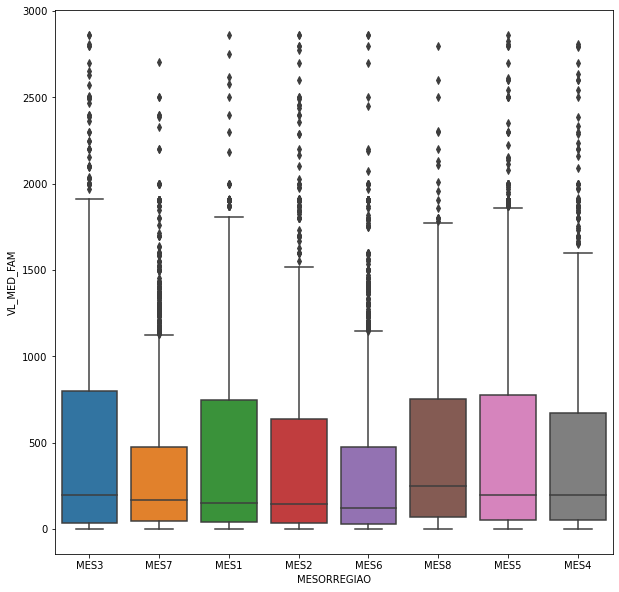

In [60]:
import seaborn as sbn
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.MESORREGIAO,orient='H')

### <font color=orange> UF</font>

                Classe     Qt         %
7              Sergipe   6112  0.048410
1                Piauí   7041  0.055769
6              Alagoas   7796  0.061749
3  Rio Grande do Norte   8024  0.063554
4              Paraíba   9179  0.072703
0             Maranhão  16409  0.129968
2                Ceará  17448  0.138198
5           Pernambuco  23181  0.183606
8                Bahia  31064  0.246044


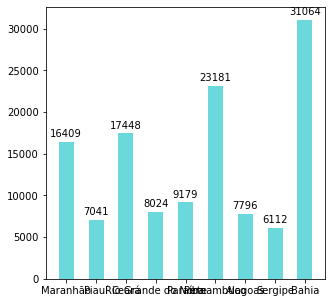

In [61]:
var = 'UF'
bvduni = tableVarUni(var)
bvdanalise = showBar(var) 
print(bvduni)


# <font color=green> LOCAL_DOM_FAM </font>

   Classe     Qt         %
0   Rural  29726  0.235446
1  Urbana  96528  0.764554


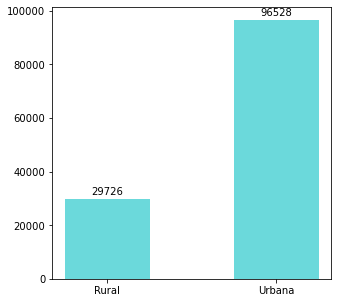

In [62]:
var = 'LOCAL_DOM_FAM'
bvduni = tableVarUni(var)
print(bvduni)
bvdanalise = showBar(var) 

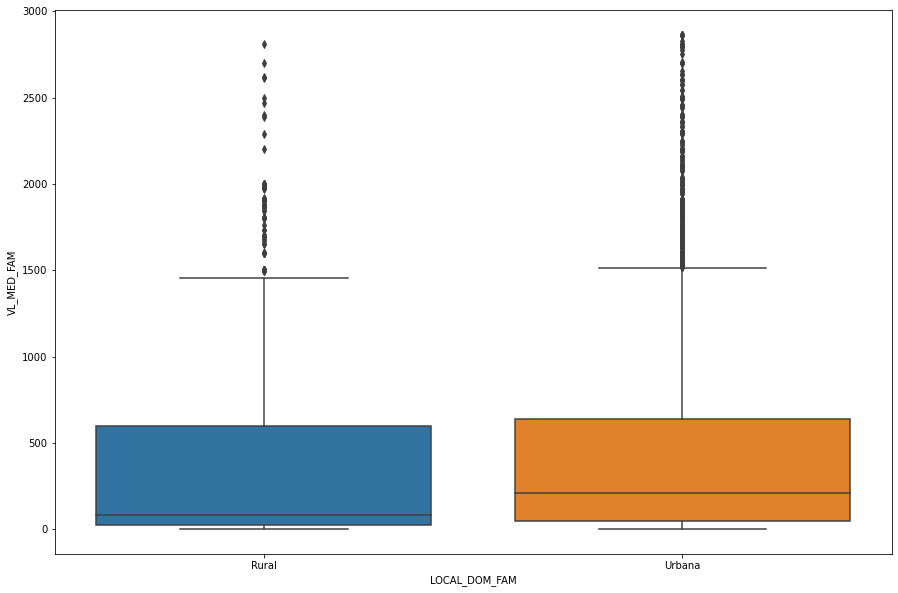

In [63]:
aux = plt.subplots(1,1,figsize=(15,10))
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.LOCAL_DOM_FAM,orient='H')

## <font color=red> ESPEC DOM FAM </font> 
Fora do modelo 90% 

                   Classe      Qt         %
0                Coletivo    1200  0.009505
2  Particular Improvisado    6756  0.053511
1   Particular Permanente  118298  0.936984


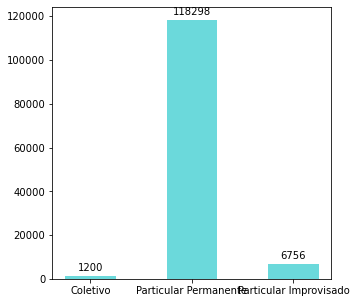

In [64]:
#df_amostra.MAT_PISO_FAMILIA = df_amostra.MAT_PISO_FAMILIA.replace(replace_)
var = 'ESPEC_DOM_FAM'
bvduni = tableVarUni(var)
print(bvduni)
bvdanalise = showBar(var) 

# <font color=green> MATERIAL PISO </font>

                    Classe     Qt         %
0           Outro Material  13599  0.107711
2  Ceramica, Lajota, Pedra  56181  0.444984
1                  Cimento  56474  0.447305


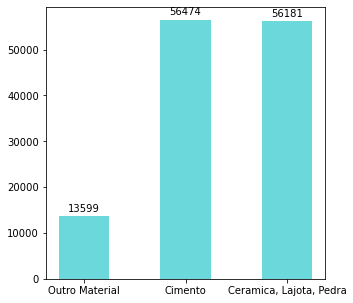

In [65]:
#replace_ = {'carpete':'Terra, Carpete, Madeira',
#            'Madeira Aproveitada':'Terra, Carpete, Madeira',
#            'Madeira Aparelhada':'Terra, Carpete, Madeira',
#            'Terra':'Terra, Carpete, Madeira'} 
#

replace_ = {
    'carpete' : 'Outro Material',   
    'Madeira Aproveitada': 'Outro Material',
    'Madeira Aparelhada': 'Outro Material',
    'Terra':'Outro Material'
}
df_amostra.MAT_PISO_FAMILIA = df_amostra.MAT_PISO_FAMILIA.replace(replace_)
var = 'MAT_PISO_FAMILIA'
bvduni = tableVarUni(var)
print(bvduni)
bvdanalise = showBar(var) 

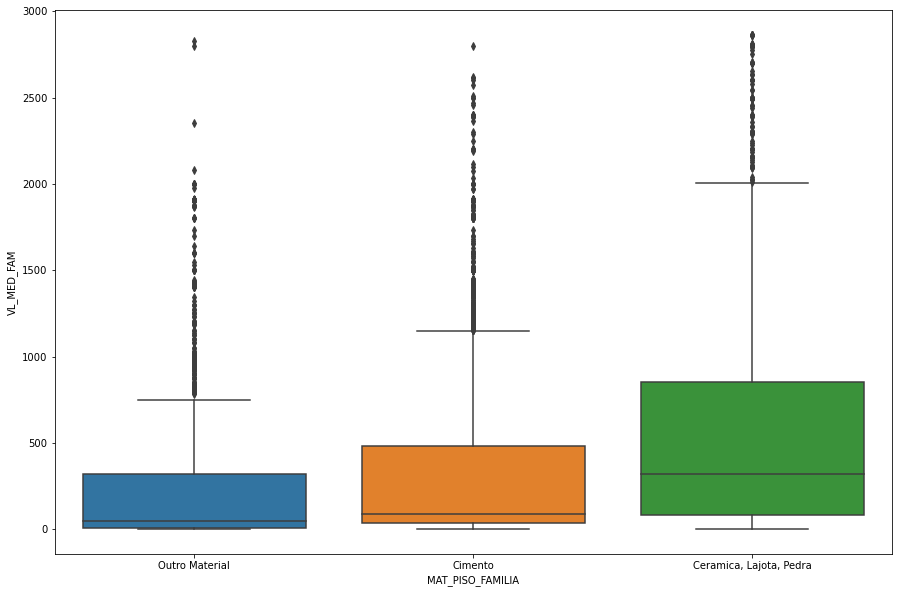

In [66]:
aux = plt.subplots(1,1,figsize=(15,10))
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.MAT_PISO_FAMILIA,orient='H')

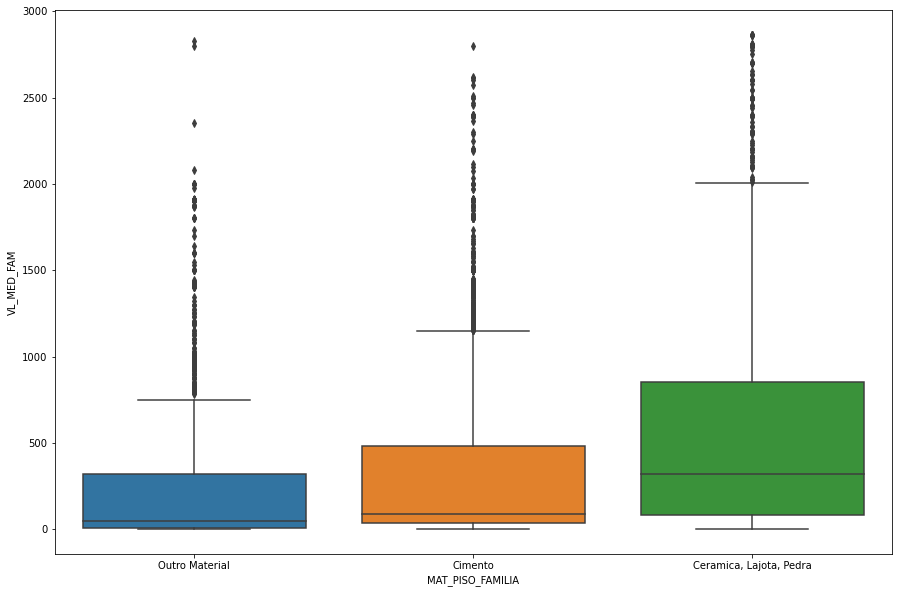

In [67]:
aux = plt.subplots(1,1,figsize=(15,10))
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.MAT_PISO_FAMILIA,orient='H')

# <font color=green> MATERIAL CONSTRUCAO </font>

                                Classe     Qt         %
0                                CAT_A  29475  0.233458
1  Alvenaria / Tijolo com Revestimento  96779  0.766542


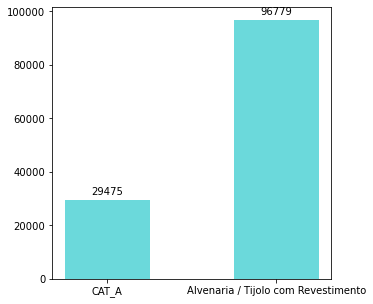

In [68]:
replace_ = {
    'Outro Material':'CAT_A',
    'Alvenaria / Tijolo sem Revestimento':'CAT_A',
    'Madeira Aproveitada':'CAT_A',
    
    'Madeira Aparelhada':'CAT_B',
    'Taipa Revestida':'CAT_B',
    
    'CAT_B': 'CAT_A',
    'Palha': 'CAT_A',
    'Taipa Não Revestida': 'CAT_A'
    
}
df_amostra.MATERIA_CONSTRUCAO = df_amostra.MATERIA_CONSTRUCAO.replace(replace_)
df_amostra.MATERIA_CONSTRUCAO = df_amostra.MATERIA_CONSTRUCAO.replace(replace_)

replace_ = {'Palha':''} 
var = 'MATERIA_CONSTRUCAO'
bvduni = tableVarUni(var)
bvdanalise = showBar(var) 
print(bvduni)


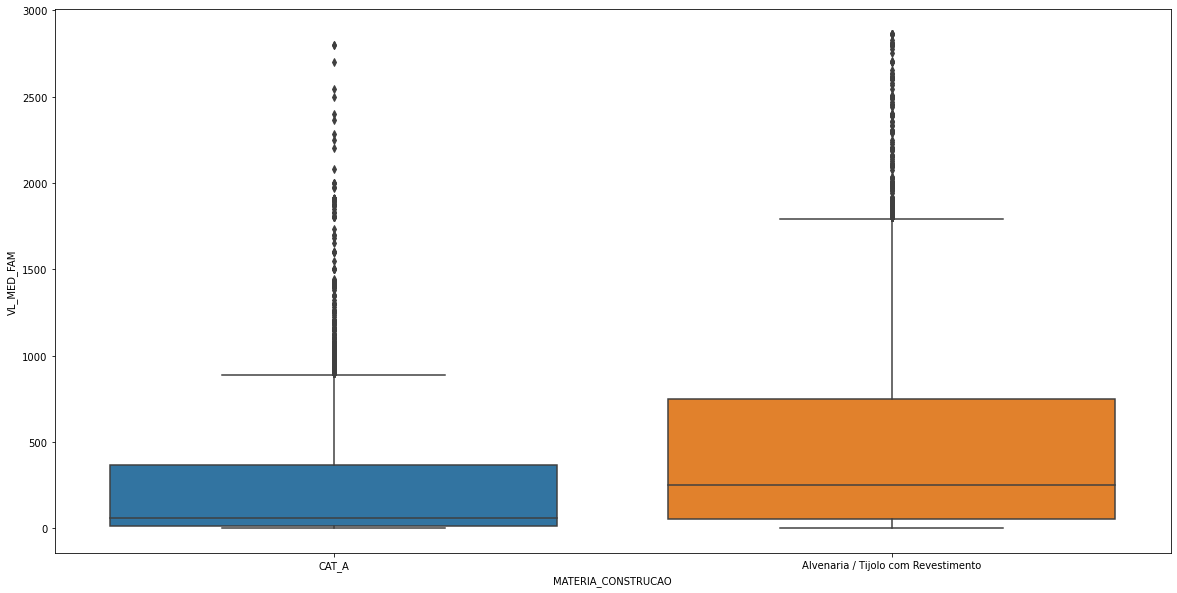

In [69]:
aux = plt.subplots(1,1,figsize=(20,10))
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.MATERIA_CONSTRUCAO,orient='H')

# <font color='green'> AGUA ENCANADA </font> 

  Classe      Qt         %
0    Nao   24256  0.192121
1    Sim  101998  0.807879


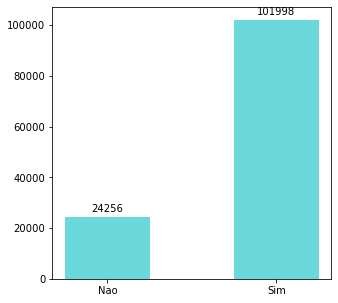

In [70]:
var = 'AGUA_ENCANADA'
bvduni = tableVarUni(var)
bvdanalise = showBar(var) 
print(bvduni)

<font color=green> ABASTECIMENTO </font>

                       Classe     Qt         %
0                      Demais  16380  0.129738
1      Cisterna,Poço,Nascente  20876  0.165349
2  Rede geral de distribuição  88998  0.704912


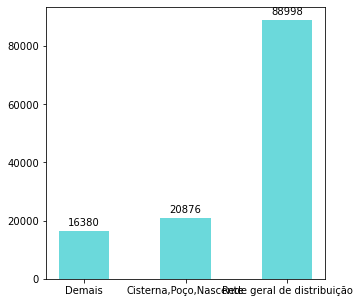

In [71]:
replace_ = { 
    'Não identificado':'Demais',
    'Outra forma':'Demais',
    'Cisterna':'Cisterna,Poço,Nascente',
    'Poço ou nascente':'Cisterna,Poço,Nascente'
}
df_amostra.ABASTECIMENTO = df_amostra.ABASTECIMENTO.replace(replace_)
var = 'ABASTECIMENTO'
bvduni = tableVarUni(var)
bvdanalise = showBar(var) 
print(bvduni)

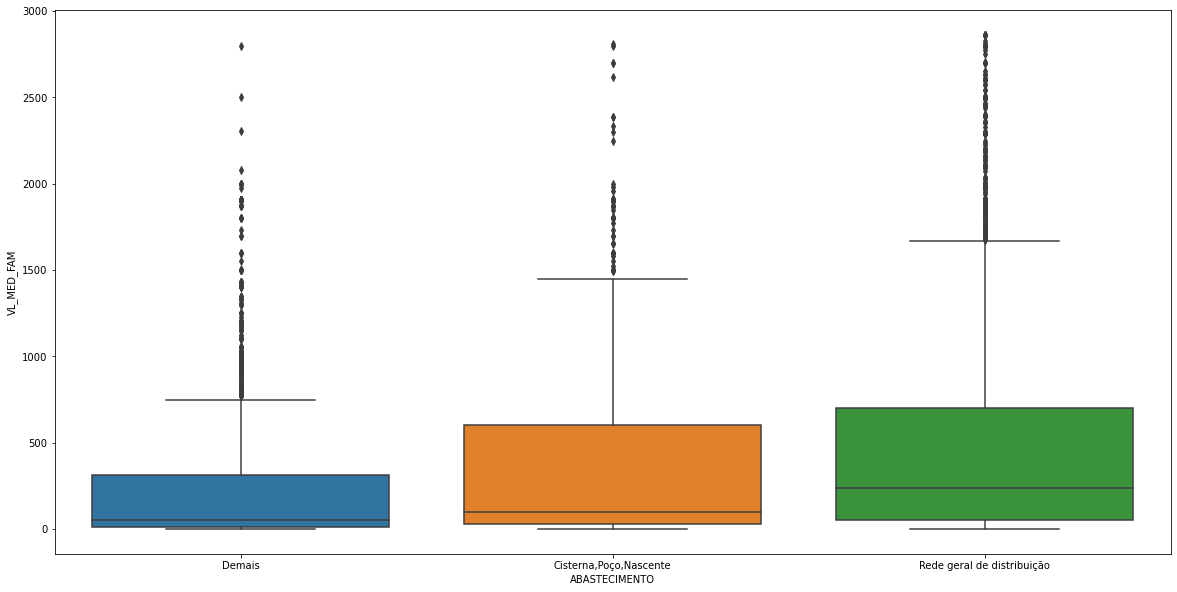

In [72]:
aux = plt.subplots(1,1,figsize=(20,10))
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.ABASTECIMENTO,orient='H')

# <font color=green> TEM_BANHEIRO </font>

  Classe      Qt        %
0    Nao   15937  0.12623
1    Sim  110317  0.87377


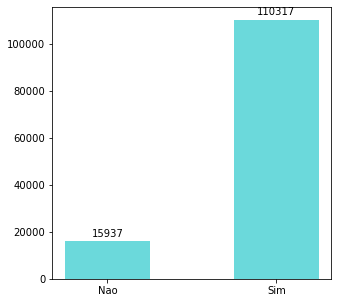

In [73]:
var = 'TEM_BANHEIRO'
bvduni = tableVarUni(var)
bvdanalise = showBar(var) 
print(bvduni)

#  <font color=green> ESCOAMENTO </font>

                               Classe     Qt         %
4                          Outro Meio   2873  0.022756
0                    Não identificado  15937  0.126230
1                       Fossa séptica  21227  0.168129
2                    Fossa rudimentar  37294  0.295389
3  Rede coletora de esgoto ou pluvial  48923  0.387497


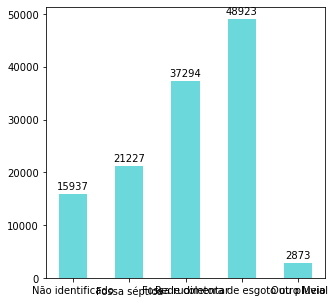

In [74]:
replace_ = {
    'Direto para um rio, lago ou mar':'Outro Meio',
    'Outra forma':'Outro Meio',
    'Vala a céu aberto':'Outro Meio'
}
df_amostra.ESCOAMENTO_SANITARIO = df_amostra.ESCOAMENTO_SANITARIO.replace(replace_)
var = 'ESCOAMENTO_SANITARIO'
bvduni = tableVarUni(var)
bvdanalise = showBar(var) 
print(bvduni)

# <font color=green> DESTINO LIXO </font>

                                   Classe     Qt         %
3                É coletado indiretamente   7935  0.062849
0                                   Outro   9953  0.078833
1  É queimado ou enterrado na propriedade  17397  0.137794
2                  É coletado diretamente  90969  0.720524


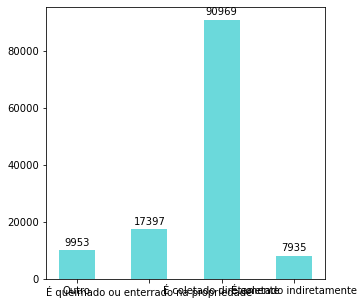

In [75]:
replace_ = {
    'É jogado em rio ou mar':'Outro',
    'Tem outro destino':'Outro',
    'É jogado em terreno baldio ou logradouro (rua, avenida, etc.)':'Outro',
    'Não identificado': 'Outro'
}
df_amostra.DESTINO_LIXO = df_amostra.DESTINO_LIXO.replace(replace_)
#print(df_amostra.DESTINO_LIXO.unique())
var = 'DESTINO_LIXO'
bvduni = tableVarUni(var)
bvdanalise = showBar(var) 
print(bvduni)

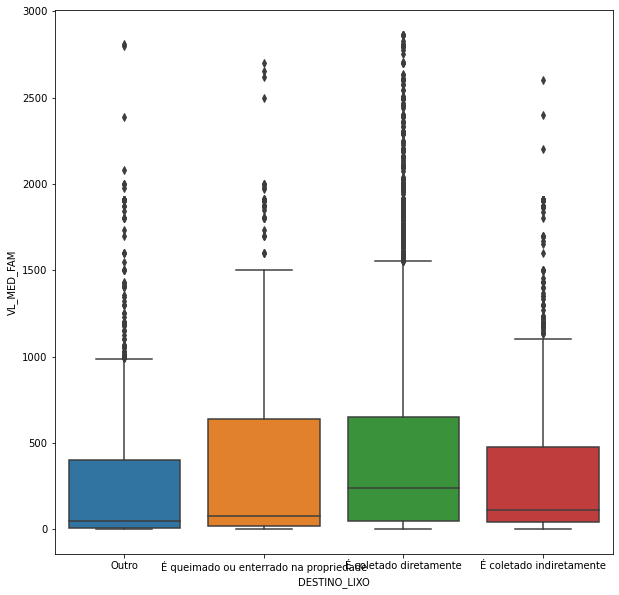

In [76]:
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.DESTINO_LIXO,orient='H')

#  <font color=red> ILUMINACAO </font>

                             Classe      Qt         %
3                              Vela     584  0.004626
5            Óleo, querosene ou gás     605  0.004792
6  Elétrica com medidor comunitário    1970  0.015603
4                       Outra forma    2548  0.020182
2              Elétrica sem medidor    5566  0.044086
0                  Não identificado    7956  0.063016
1      Elétrica com medidor próprio  107025  0.847696


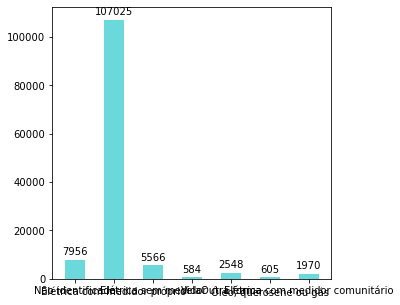

In [77]:
var = 'ILUMINACAO'
bvduni = tableVarUni(var)
bvdanalise = showBar(var) 
print(bvduni)

# <font color=green> CALCAMENTO </font>

    Classe     Qt         %
2  Parcial   8446  0.066897
0   Nenhum  50708  0.401635
1    Total  67100  0.531468


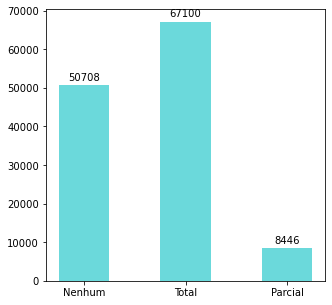

In [78]:
var = 'CALCAMENTO'
bvduni = tableVarUni(var)
bvdanalise = showBar(var) 
print(bvduni)

# <font color=green> CLASSE_CIDADE </font>

                 Classe     Qt         %
2               Capital  23779  0.188343
1  Região Metropolitana  26749  0.211867
0                Outros  75726  0.599791


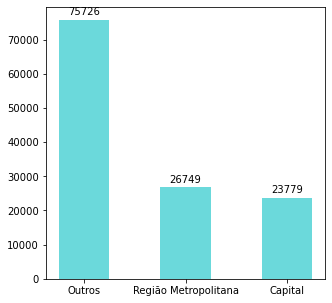

In [79]:
var = 'CLASSE_CIDADE'
bvduni = tableVarUni(var)
bvdanalise = showBar(var) 
print(bvduni)

# <font color=orange> TEM DEFICIENTE </font>

  Classe      Qt        %
1      S   21174  0.16771
0      N  105080  0.83229


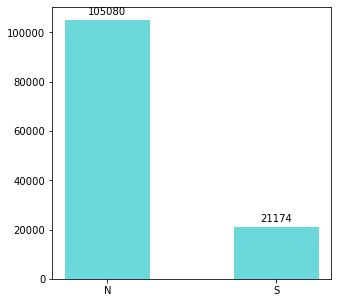

In [80]:

var = 'TEM_DEFICIENTE'
bvduni = tableVarUni(var)
bvdanalise = showBar(var)
print(bvduni)

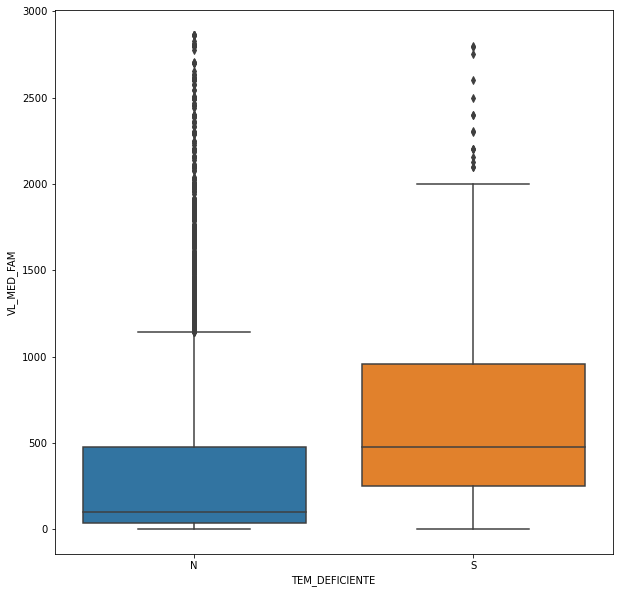

In [81]:
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.TEM_DEFICIENTE,orient='H')

# <font color=green> ANALFABETO </font>

  Classe     Qt         %
1      S  28327  0.224365
0      N  97927  0.775635


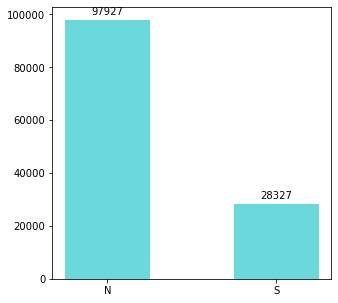

In [82]:
var = 'ANALFABETO2'
bvduni = tableVarUni(var)
bvdanalise = showBar(var)
print(bvduni)

# <font color=green> MENOR ESTUDA </font> 

                      Classe     Qt         %
2  Todos Menores Não Estudam   8640  0.068433
1     s_idade/algum_n_estuda  13114  0.103870
3      Todos Menores Estudam  18117  0.143496
0              Não tem Menor  86383  0.684200


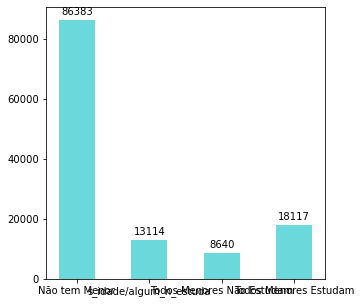

In [137]:
replace_ = {
    'Existe menores que não estuda':'s_idade/algum_n_estuda',
    'Menor sem idade escolar':'s_idade/algum_n_estuda',
    '':'s_idade/algum_n_estuda'
}

df_amostra.MENOR_ESTUDA = df_amostra.MENOR_ESTUDA.replace(replace_)
var = 'MENOR_ESTUDA'
bvduni = tableVarUni(var)
bvdanalise = showBar(var)
print(bvduni)

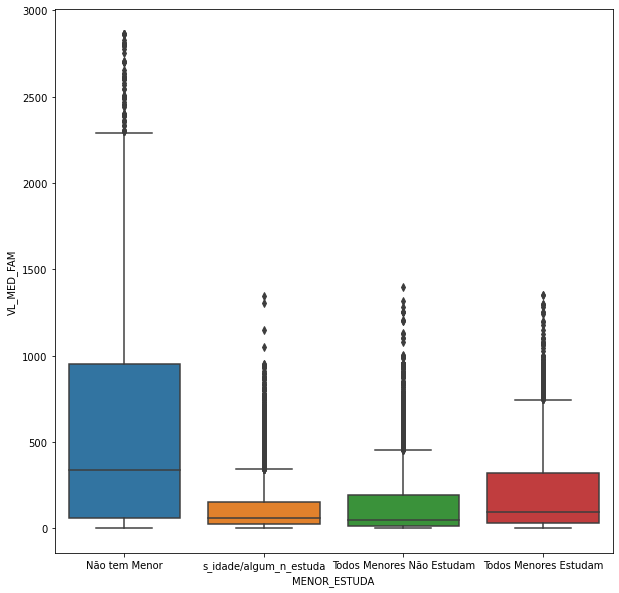

In [138]:
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.MENOR_ESTUDA,orient='H')

# <font color=green> TM_BF</font> 

   Classe     Qt         %
0       1  53706  0.425381
1       0  72548  0.574619


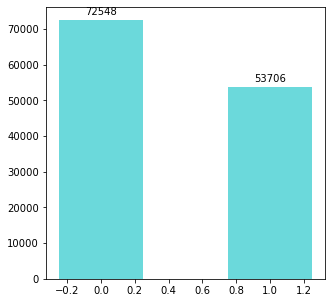

In [139]:
#replace_ = {
#    'Existe menores que não estuda':'s_idade/algum_n_estuda',
#    'Menor sem idade escolar':'s_idade/algum_n_estuda',
#    '':'s_idade/algum_n_estuda'
#}
#
df_amostra.MENOR_ESTUDA = df_amostra.MENOR_ESTUDA.replace(replace_)
var = 'TM_BF'
bvduni = tableVarUni(var)
bvdanalise = showBar(var)
print(bvduni)

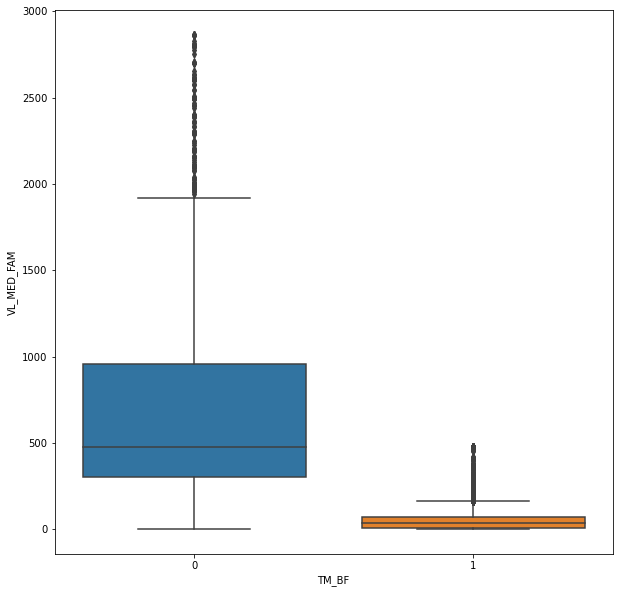

In [140]:
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.TM_BF,orient='H')

# <font color=green><strong> COR </strong> </font> 

        Classe     Qt         %
0          IAP   7530  0.059642
3       Branca  13186  0.104440
2  Mais de uma  20589  0.163076
1        Parda  84949  0.672842


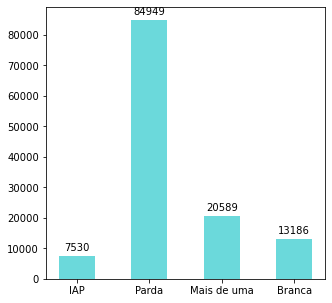

In [141]:
replace_um = {
    'Preta':'Preta', ' Parda':'Parda', 'Parda':'Parda', 'Mais de uma':'Mais de uma', ' Preta':'Preta', 'Branca':'Branca', ' Branca':'Branca',
 ' Mais de uma':'Mais de uma', '  Parda':'Parda', '  Mais de uma':'Mais de uma', ' Amarela':'Amarela', ' Indigena':'Indigena',
 'Indigena':'Indigena', 'Amarela':'Amarela', '  Branca':'Branca', '  Amarela':'Amarela', '  Preta':'Preta', '  Indigena':'Indigena',
}
df_amostra.COR = df_amostra.COR.replace(replace_um)

replace_dois = {
    'Indigena':'IAP',
    'Amarela':'IAP',
    'Preta':'IAP'
}

df_amostra.COR = df_amostra.COR.replace(replace_dois)
var = 'COR'
bvduni = tableVarUni(var)
bvdanalise = showBar(var)
print(bvduni)

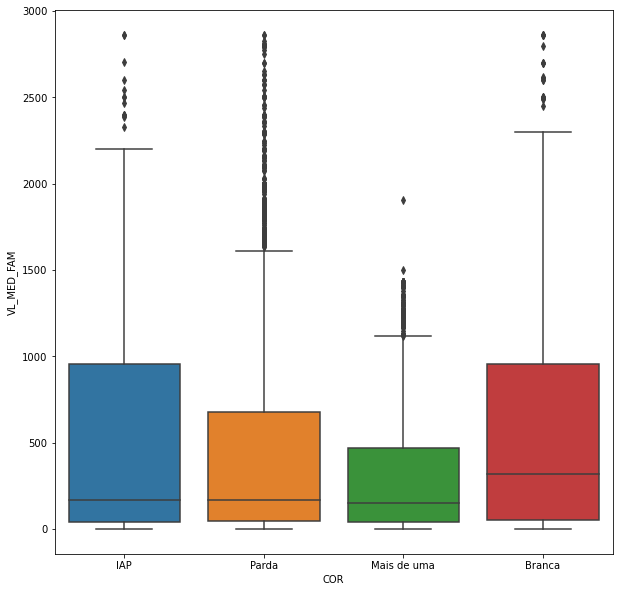

In [142]:
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.COR,orient='H')

# <font color=green> ENSINO </font> 

                             Classe     Qt         %
3            PréVestibulareSuperior   3055  0.024197
4                     NAO INFORMADO   5568  0.044102
1                            Nenhum  22809  0.180660
2                             Medio  39500  0.312861
0  Fundamental(incluialfabetização)  55322  0.438180


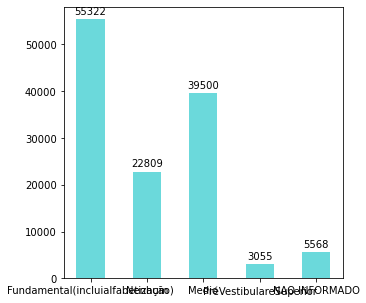

In [143]:
df_amostra.ENSINO = df_amostra.ENSINO.replace({'1.':'','2.':'','3.':'','4.':''},regex=True)
var = 'ENSINO'
bvduni = tableVarUni(var)
bvdanalise = showBar(var)
print(bvduni)

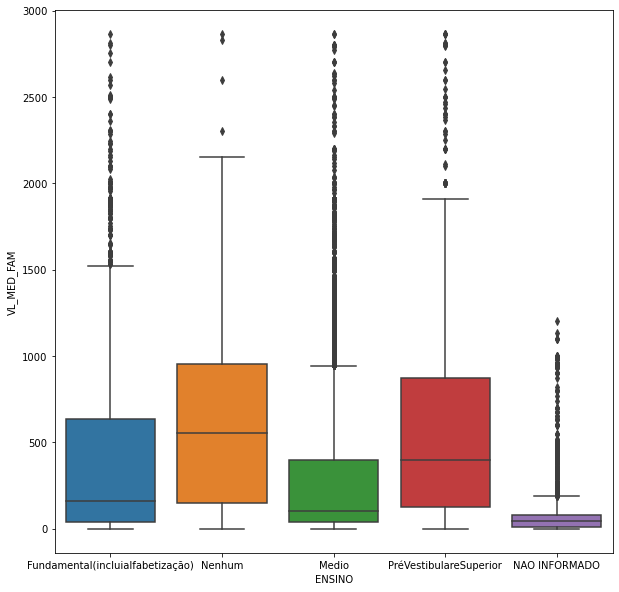

In [144]:
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.ENSINO,orient='H')

In [145]:
import matplotlib.pyplot as plt 
import seaborn as sbn

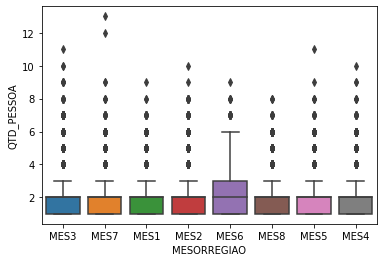

In [146]:
sbn.boxplot(y=df_amostra.QTD_PESSOA, x = df_amostra.MESORREGIAO,orient='H')

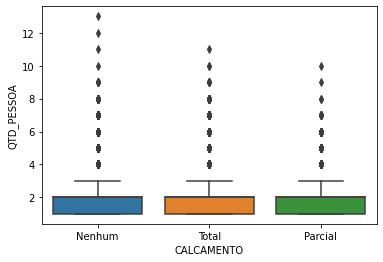

In [147]:
sbn.boxplot(y=df_amostra.QTD_PESSOA, x = df_amostra.CALCAMENTO,orient='H')

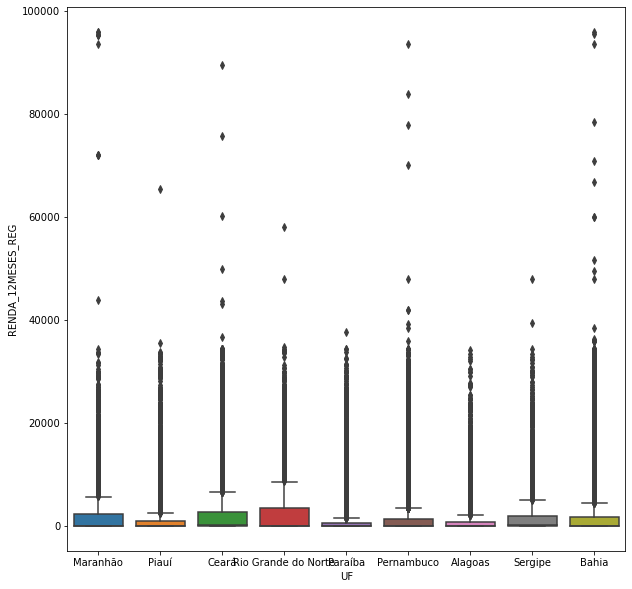

In [148]:
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=df_amostra.RENDA_12MESES_REG, x = df_amostra.UF,orient='H')

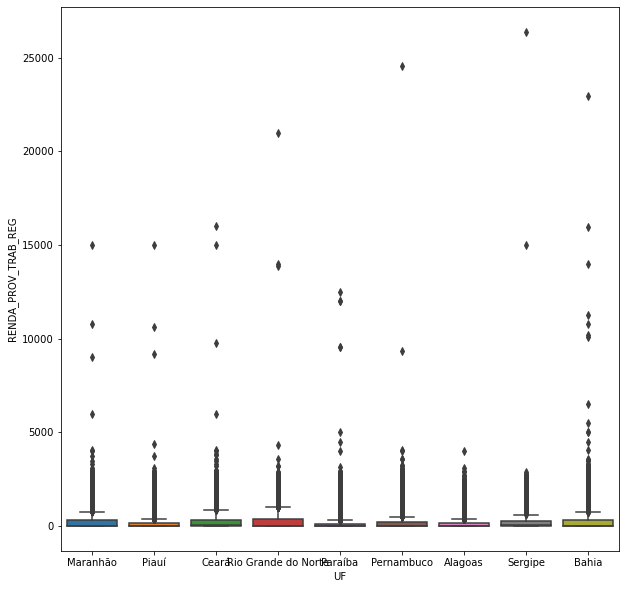

In [149]:
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=df_amostra.RENDA_PROV_TRAB_REG, x = df_amostra.UF,orient='H')

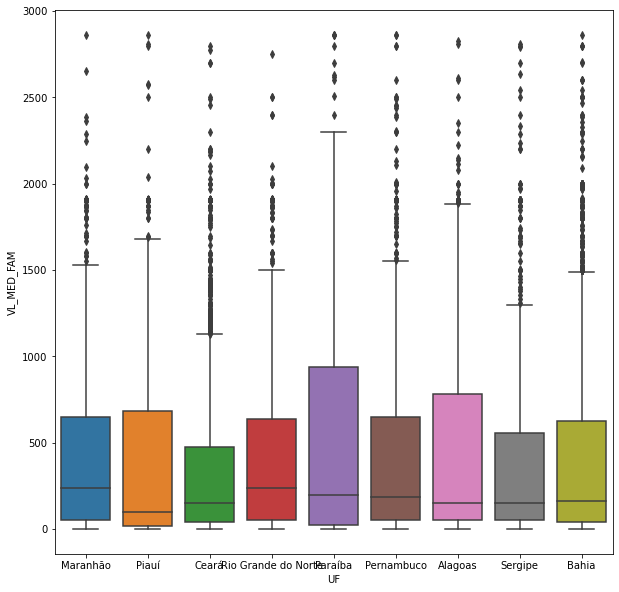

In [150]:
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.UF,orient='H')

# <font color=blue size=10> QUANTITATIVA </font>

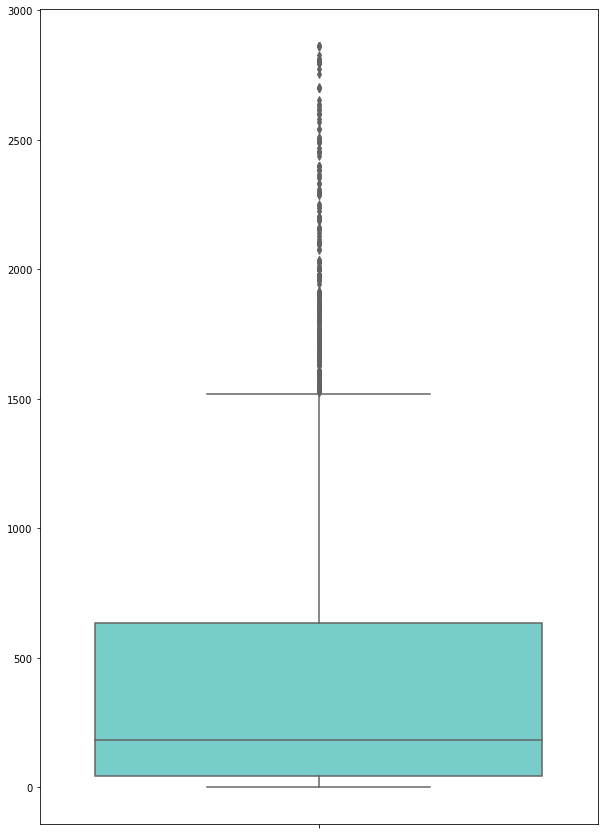

In [85]:
aux = plt.subplots(1,1,figsize=(10,15))
sbn.boxplot(y=[df_amostra.VL_MED_FAM], color='#6ADBD9') 

(array([7.1138e+04, 2.2194e+04, 4.4400e+03, 2.6273e+04, 7.7600e+02,
        3.9500e+02, 9.0400e+02, 4.1000e+01, 5.1000e+01, 4.2000e+01]),
 array([   0. ,  286.2,  572.4,  858.6, 1144.8, 1431. , 1717.2, 2003.4,
        2289.6, 2575.8, 2862. ]),
 <a list of 10 Patch objects>)

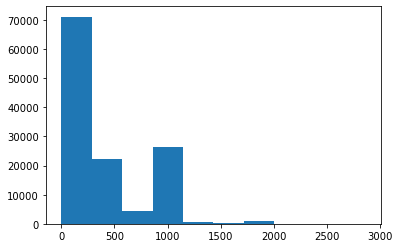

In [152]:
plt.hist(df_amostra.VL_MED_FAM)

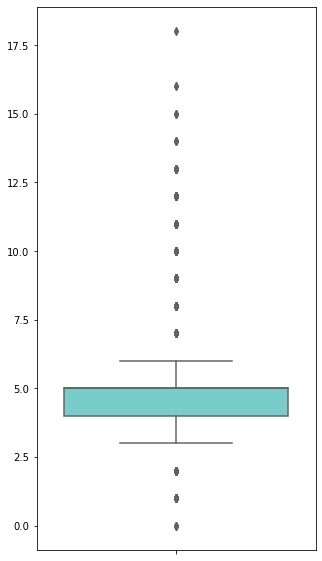

In [153]:
aux = plt.subplots(1,1,figsize=(5,10))
sbn.boxplot(y=[df_amostra.QTD_COMODO_DOMIC_FAM],color='#6ADBD9') 

(array([2.4060e+03, 1.9398e+04, 8.2004e+04, 1.9659e+04, 1.8360e+03,
        7.9300e+02, 1.2200e+02, 2.6000e+01, 8.0000e+00, 2.0000e+00]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

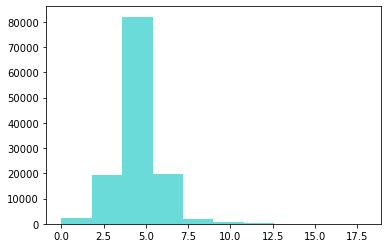

In [154]:
plt.hist(df_amostra.QTD_COMODO_DOMIC_FAM, color='#6ADBD9')

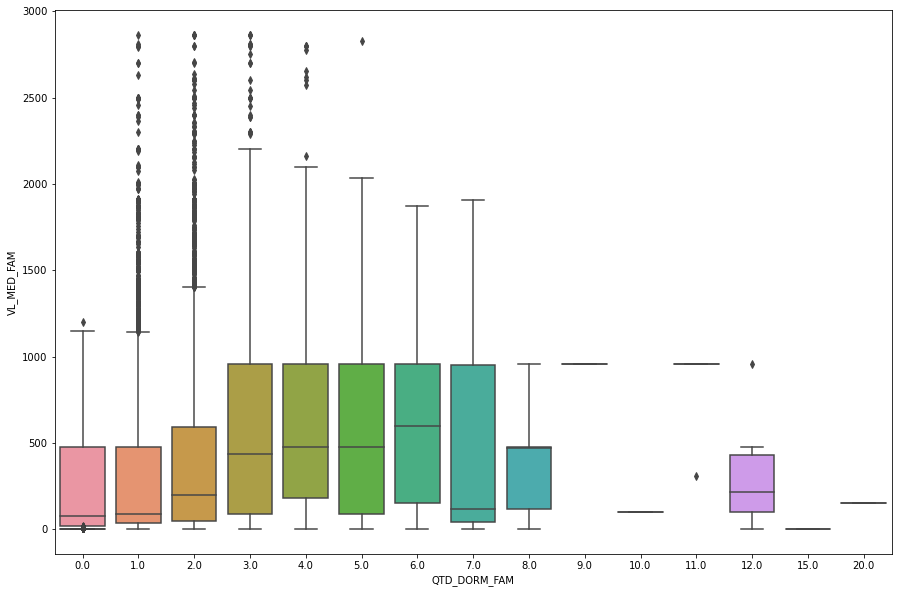

In [155]:
aux = plt.subplots(1,1,figsize=(15,10))
sbn.boxplot(y=[df_amostra.QTD_DORM_FAM]) 
sbn.boxplot(y=df_amostra.VL_MED_FAM, x = df_amostra.QTD_DORM_FAM,orient='H')

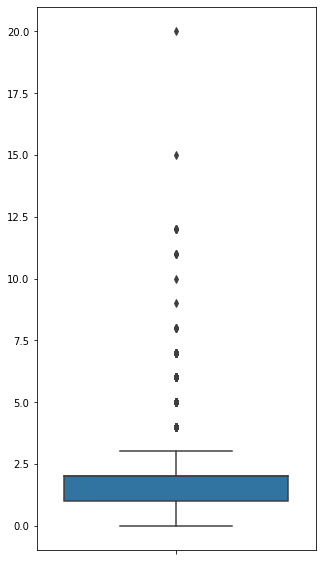

In [156]:
aux = plt.subplots(1,1,figsize=(5,10))
sbn.boxplot(y=[df_amostra.QTD_DORM_FAM]) 

(array([4.6000e+04, 7.8024e+04, 2.0960e+03, 1.1300e+02, 7.0000e+00,
        6.0000e+00, 6.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

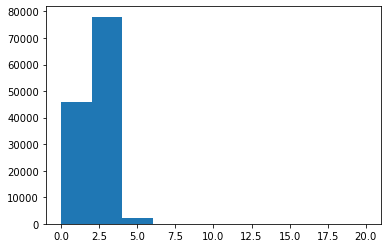

In [157]:
plt.hist(df_amostra.QTD_DORM_FAM)

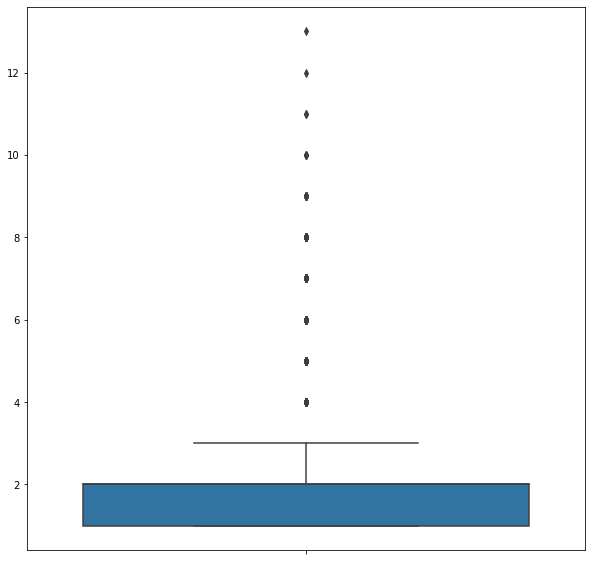

In [158]:
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=[df_amostra.QTD_PESSOA])

(array([4.6000e+04, 7.8024e+04, 2.0960e+03, 1.1300e+02, 7.0000e+00,
        6.0000e+00, 6.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

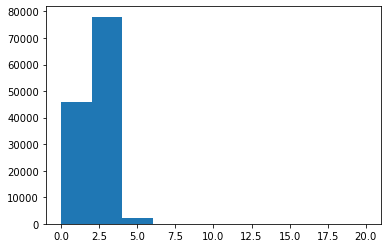

In [159]:
plt.hist(df_amostra.QTD_DORM_FAM)

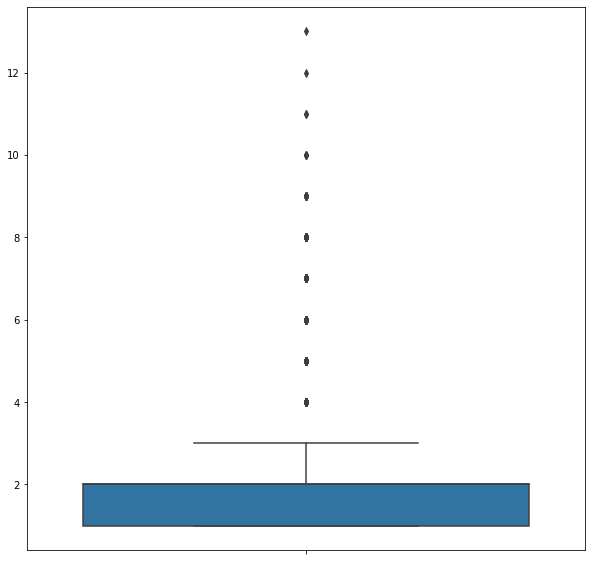

In [160]:
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=[df_amostra.QTD_PESSOA])

(array([9.8052e+04, 1.8152e+04, 7.4780e+03, 1.9010e+03, 4.7800e+02,
        1.7100e+02, 1.4000e+01, 4.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <a list of 10 Patch objects>)

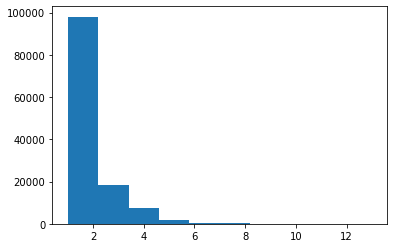

In [161]:
plt.hist(df_amostra.QTD_PESSOA)

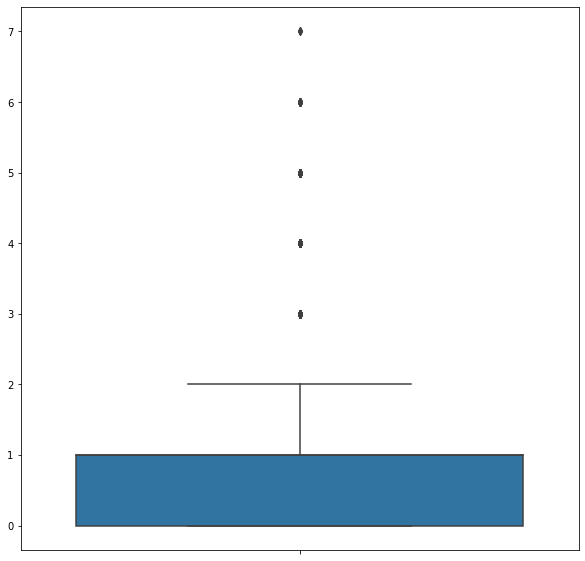

In [162]:
''
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=[df_amostra.QTD_MASC])

(array([4.0681e+04, 6.8321e+04, 1.3828e+04, 0.0000e+00, 2.8940e+03,
        4.3500e+02, 0.0000e+00, 7.5000e+01, 1.7000e+01, 3.0000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

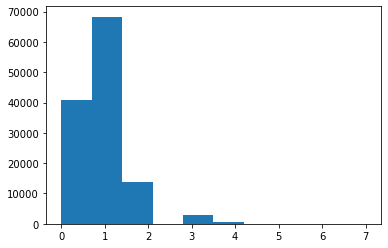

In [163]:
'QTD_MASC'
plt.hist(df_amostra.QTD_MASC)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


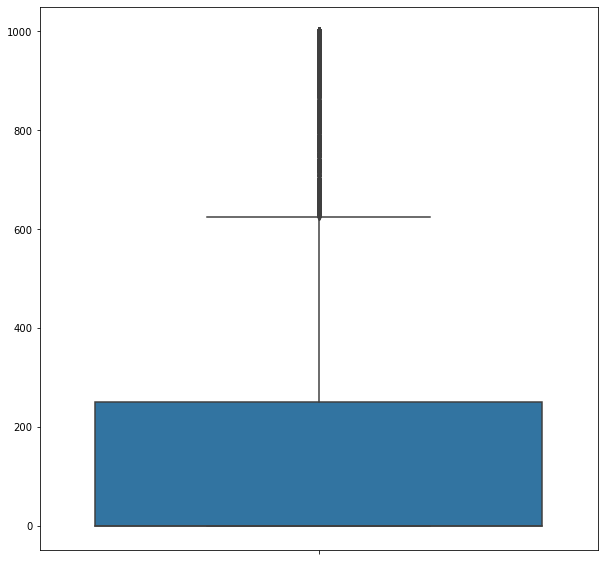

In [164]:


#df_amostra['RENDA_PROV_TRAB_REG2'] = df_amostra.RENDA_PROV_TRAB_REG
aux = plt.subplots(1,1,figsize=(10,10))

df_amostra.RENDA_PROV_TRAB_REG[df_amostra.RENDA_PROV_TRAB_REG >= 1000] = 1000
sbn.boxplot(y=[df_amostra.RENDA_PROV_TRAB_REG])


(array([70142.,  6967.,  6510.,  4985.,  5543.,  1828.,  3662.,   854.,
         2836.,  1047.,  1819.,   163.,  1279.,   170.,   639.,   119.,
          806.,   167.,  1398., 15320.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <a list of 20 Patch objects>)

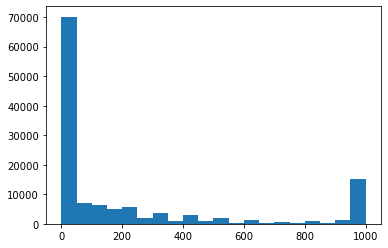

In [165]:
plt.hist(df_amostra.RENDA_PROV_TRAB_REG, bins=20)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


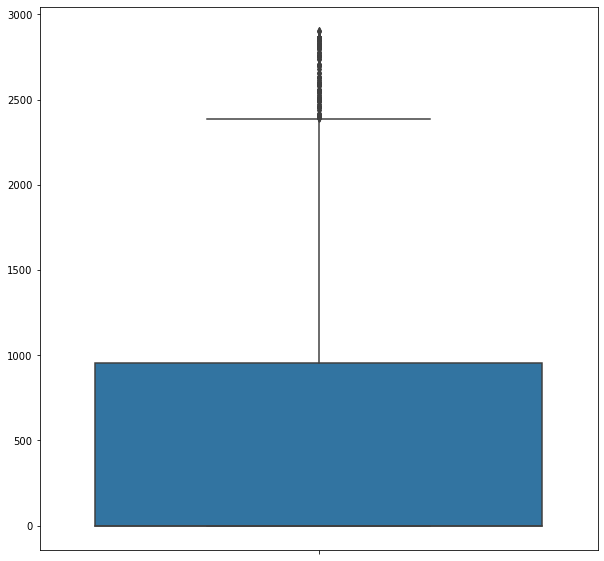

In [166]:


#df_amostra['RENDA_PROV_TRAB_REG2'] = df_amostra.RENDA_PROV_TRAB_REG
aux = plt.subplots(1,1,figsize=(10,10))

df_amostra.RENDA_APOSENTADORIA[df_amostra.RENDA_APOSENTADORIA >= 2900] = 2900
sbn.boxplot(y=[df_amostra.RENDA_APOSENTADORIA])


(array([8.7704e+04, 5.6000e+01, 6.3000e+01, 1.2200e+02, 6.3000e+01,
        3.5000e+01, 3.0813e+04, 1.5700e+02, 2.5500e+02, 1.6500e+02,
        1.2500e+02, 9.4000e+01, 6.4200e+02, 5.2600e+03, 6.9000e+01,
        6.1000e+01, 5.8000e+01, 4.6000e+01, 2.7000e+01, 4.3900e+02]),
 array([   0.,  145.,  290.,  435.,  580.,  725.,  870., 1015., 1160.,
        1305., 1450., 1595., 1740., 1885., 2030., 2175., 2320., 2465.,
        2610., 2755., 2900.]),
 <a list of 20 Patch objects>)

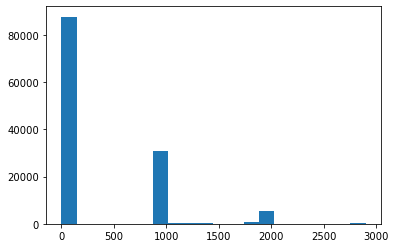

In [167]:
plt.hist(df_amostra.RENDA_APOSENTADORIA, bins=20)

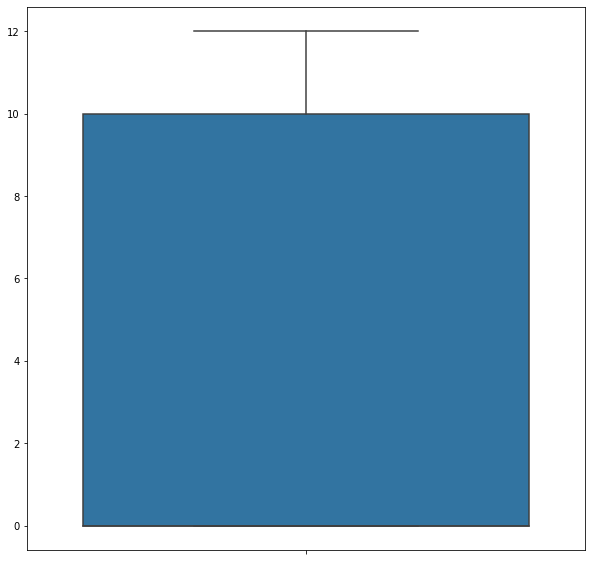

In [168]:


#df_amostra['RENDA_PROV_TRAB_REG2'] = df_amostra.RENDA_PROV_TRAB_REG
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=[df_amostra.PERIODO_MAX_TRAB_MEMB])


(array([67700.,  3993.,     0.,  4369.,     0.,  3958.,  2458.,     0.,
         2858.,     0.,  3838.,   904.,     0.,  1422.,     0.,   653.,
         3948.,     0.,   344., 29809.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ,
         6.6,  7.2,  7.8,  8.4,  9. ,  9.6, 10.2, 10.8, 11.4, 12. ]),
 <a list of 20 Patch objects>)

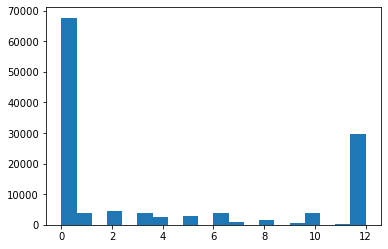

In [169]:
plt.hist(df_amostra.PERIODO_MAX_TRAB_MEMB, bins=20)

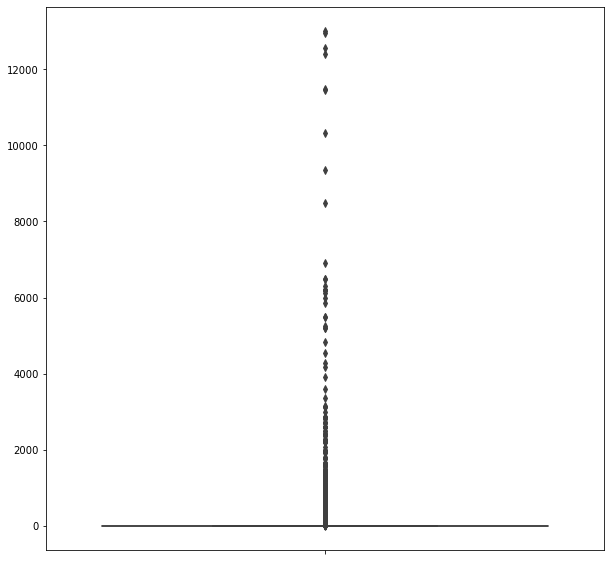

In [170]:


#df_amostra['RENDA_PROV_TRAB_REG2'] = df_amostra.RENDA_PROV_TRAB_REG
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=[df_amostra.VL_MENOR])


(array([1.26014e+05, 1.14000e+02, 5.10000e+01, 2.70000e+01, 1.60000e+01,
        2.00000e+00, 3.00000e+00, 2.00000e+00, 5.00000e+00, 8.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([    0.,   650.,  1300.,  1950.,  2600.,  3250.,  3900.,  4550.,
         5200.,  5850.,  6500.,  7150.,  7800.,  8450.,  9100.,  9750.,
        10400., 11050., 11700., 12350., 13000.]),
 <a list of 20 Patch objects>)

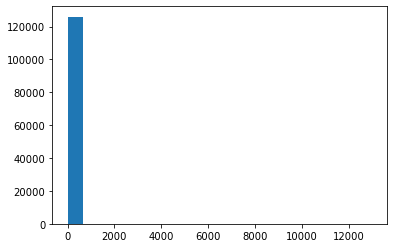

In [171]:
plt.hist(df_amostra.VL_MENOR, bins=20)

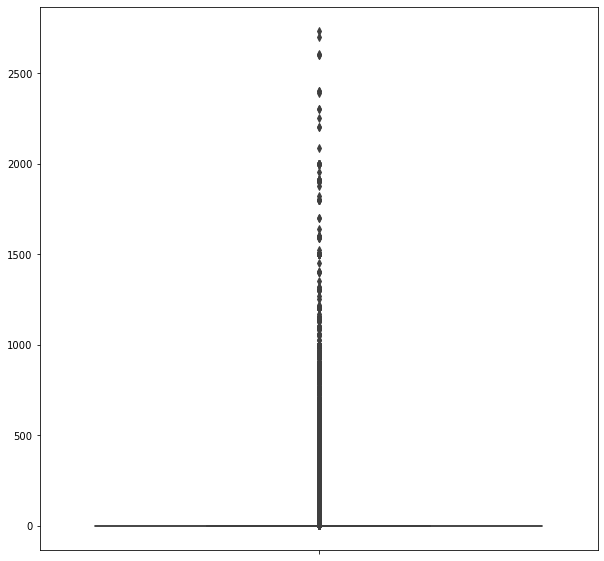

In [172]:


#df_amostra['RENDA_PROV_TRAB_REG2'] = df_amostra.RENDA_PROV_TRAB_REG
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=[df_amostra.RENDAS_DIVERSAS])


(array([1.14891e+05, 7.09500e+03, 2.31700e+03, 7.17000e+02, 3.12000e+02,
        2.23000e+02, 4.41000e+02, 8.60000e+01, 5.00000e+01, 1.50000e+01,
        3.90000e+01, 8.00000e+00, 3.00000e+00, 2.80000e+01, 1.50000e+01,
        1.00000e+00, 5.00000e+00, 3.00000e+00, 0.00000e+00, 5.00000e+00]),
 array([   0.  ,  136.55,  273.1 ,  409.65,  546.2 ,  682.75,  819.3 ,
         955.85, 1092.4 , 1228.95, 1365.5 , 1502.05, 1638.6 , 1775.15,
        1911.7 , 2048.25, 2184.8 , 2321.35, 2457.9 , 2594.45, 2731.  ]),
 <a list of 20 Patch objects>)

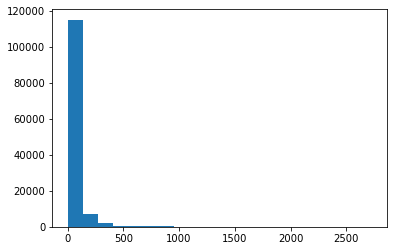

In [173]:
plt.hist(df_amostra.RENDAS_DIVERSAS, bins=20)

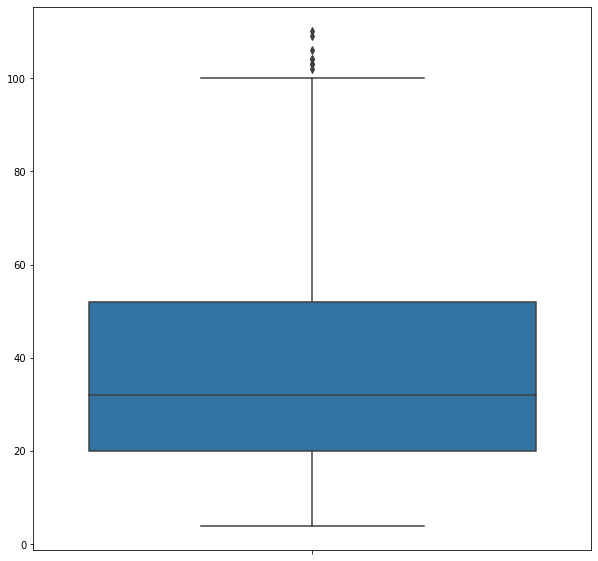

In [174]:


#df_amostra['RENDA_PROV_TRAB_REG2'] = df_amostra.RENDA_PROV_TRAB_REG
aux = plt.subplots(1,1,figsize=(10,10))
sbn.boxplot(y=[df_amostra.MEDIA_IDADE])


(array([4.7450e+03, 1.0075e+04, 1.6537e+04, 1.8120e+04, 1.0551e+04,
        8.9180e+03, 9.3580e+03, 7.3270e+03, 7.6250e+03, 7.1120e+03,
        8.3970e+03, 7.2820e+03, 4.8190e+03, 3.3800e+03, 1.2640e+03,
        5.1300e+02, 1.6700e+02, 4.7000e+01, 1.4000e+01, 3.0000e+00]),
 array([  4. ,   9.3,  14.6,  19.9,  25.2,  30.5,  35.8,  41.1,  46.4,
         51.7,  57. ,  62.3,  67.6,  72.9,  78.2,  83.5,  88.8,  94.1,
         99.4, 104.7, 110. ]),
 <a list of 20 Patch objects>)

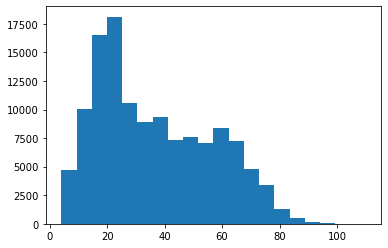

In [175]:
plt.hist(df_amostra.MEDIA_IDADE, bins=20)

In [176]:
df_amostra['RENDAS'] = df_amostra.RENDAS_DIVERSAS
df_amostra.RENDAS[df_amostra.RENDAS >= 1] = 1
df_amostra.RENDAS = df_amostra.RENDAS.astype(str)
df_amostra.RENDAS = df_amostra.RENDAS.replace({'0':'N',
                                               '1':'S'})
###################################################################
df_amostra['TMENOR'] = df_amostra.VL_MENOR
df_amostra.TMENOR[df_amostra.TMENOR >= 1] = 1
df_amostra.TMENOR = df_amostra.TMENOR.astype(str)
df_amostra.TMENOR = df_amostra.TMENOR.replace({'0':'N',
                                               '1':'S'})


df_amostra[['RENDAS','RENDAS_DIVERSAS']],df_amostra[['TMENOR','VL_MENOR']]

#df_amostra.RENDAS.count().unique()

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(       RENDAS  RENDAS_DIVERSAS
 0           N                0
 1           N                0
 2           N                0
 3           N                0
 4           S              500
 ...       ...              ...
 126249      N                0
 126250      N                0
 126251      N                0
 126252      N                0
 126253      N                0
 
 [126254 rows x 2 columns],
        TMENOR  VL_MENOR
 0           N         0
 1           N         0
 2           N         0
 3           N         0
 4           N         0
 ...       ...       ...
 126249      N         0
 126250      N         0
 126251      N         0
 126252      N         0
 126253      N         0
 
 [126254 rows x 2 columns])

In [177]:

print(tableVarUni('RENDAS')),print(tableVarUni('TMENOR'))
#df_amostra.VL_MENOR

  Classe      Qt         %
1      S   24462  0.193752
0      N  101792  0.806248
  Classe      Qt       %
1      S     909  0.0072
0      N  125345  0.9928


(None, None)

1. RENDAS diversas pode ser considerado, 
2. Já rendas do menor, ao meu ver, prefiro não usa-lo 

## <font color=blue> MODELAGEM </font>

In [178]:
df_amostra = df_amostra.replace(' ','_',regex=True)
#df_amostra = df_amostra.replace('','_',regex=True)
df_amostra = df_amostra.replace('/','_',regex=True)


#for i in df_amostra.columns.tolist()
df_amostra.head(10)


,IBGE,ANO_CADASTRO,ID_FAMILIA,SEXO_RESP,UF,MUNICIPIO,MESORREGIAO,VL_MED_FAM,LOCAL_DOM_FAM,ESPEC_DOM_FAM,...,RENDAS_DIVERSAS,PERIODO_MAX_TRAB_MEMB,VL_MENOR,MEDIA_IDADE,TM_BF,COR,ENSINO,ANALFABETO2,RENDAS,TMENOR
0,2100055,2018,3229159,M,Maranhão,Açailândia,MES3,0,Rural,Coletivo,...,0,0.0,0,32,1,IAP,Fundamental(incluialfabetização),N,N,N
1,2100055,2018,845959,F,Maranhão,Açailândia,MES3,0,Urbana,Particular_Permanente,...,0,0.0,0,27,0,Parda,Fundamental(incluialfabetização),N,N,N
2,2100055,2018,3231367,F,Maranhão,Açailândia,MES3,0,Urbana,Particular_Permanente,...,0,0.0,0,35,1,Parda,Nenhum,S,N,N
3,2100055,2018,864328,F,Maranhão,Açailândia,MES3,0,Urbana,Particular_Permanente,...,0,0.0,0,10,1,Parda,Medio,N,N,N
4,2100055,2018,3230274,M,Maranhão,Açailândia,MES3,100,Urbana,Particular_Permanente,...,500,0.0,0,21,1,Mais_de_uma,Fundamental(incluialfabetização),N,S,N
5,2100055,2018,3232250,F,Maranhão,Açailândia,MES3,100,Urbana,Particular_Permanente,...,0,12.0,0,33,0,Parda,Medio,N,N,N
6,2100055,2018,3229594,F,Maranhão,Açailândia,MES3,100,Urbana,Particular_Permanente,...,0,12.0,0,12,1,Parda,Medio,N,N,N
7,2100055,2018,817958,M,Maranhão,Açailândia,MES3,100,Urbana,Particular_Permanente,...,200,0.0,0,24,0,Parda,Medio,N,S,N
8,2100055,2018,3229846,F,Maranhão,Açailândia,MES3,100,Urbana,Particular_Permanente,...,0,12.0,0,12,0,Parda,Medio,N,N,N
9,2100055,2018,3232231,F,Maranhão,Açailândia,MES3,100,Urbana,Particular_Permanente,...,0,12.0,0,19,1,Parda,Fundamental(incluialfabetização),N,N,N


In [179]:
df_amostra.TM_BF = df_amostra.TM_BF.astype(str)

df_amostra_dm = df_amostra[['SEXO_RESP','UF','MESORREGIAO','LOCAL_DOM_FAM',
           #'ESPEC_DOM_FAM',
            'MAT_PISO_FAMILIA',   'MATERIA_CONSTRUCAO',
            'AGUA_ENCANADA','ABASTECIMENTO','TEM_BANHEIRO','ESCOAMENTO_SANITARIO','DESTINO_LIXO',#'ILUMINACAO',
            'CALCAMENTO','CLASSE_CIDADE'
                            #,'TEM_DEFICIENTE'
            ,'ANALFABETO2','MENOR_ESTUDA','TM_BF','COR','ENSINO','RENDAS']]

fire_on_the_park = pd.get_dummies(
    df_amostra_dm, 
    prefix_sep='_',
    drop_first=True
)
fire_on_the_park.shape

(126254, 48)

In [180]:
df_amostra[['QTD_COMODO_DOMIC_FAM',
                      'QTD_DORM_FAM',
                      'QTD_PESSOA',
                      'QTD_MASC',
                      'RENDA_PROV_TRAB_REG'
                      #,'RENDAS_DIVERSAS' -- incluso com categorica 
                      ,'PERIODO_MAX_TRAB_MEMB'
                      #,'VL_MENOR' --deixaremos no escanteio
                      ,'MEDIA_IDADE']].shape

(126254, 7)

In [181]:
from sklearn.model_selection import train_test_split 

In [182]:
target = df_amostra[['VL_MED_FAM']]
another = fire_on_the_park


another = pd.concat([fire_on_the_park,df_amostra[['QTD_COMODO_DOMIC_FAM',
                      'QTD_DORM_FAM',
                      'QTD_PESSOA',
                      'QTD_MASC',
                      'RENDA_PROV_TRAB_REG'
                      #,'RENDAS_DIVERSAS'
                      ,'PERIODO_MAX_TRAB_MEMB'
                      #,'VL_MENOR'
                      ,'MEDIA_IDADE']]],axis=1)
y_train, y_test, x_train, x_test = train_test_split(target,another, test_size = 0.3, random_state = 42)


df_amostra[['VL_MED_FAM']].to_csv('TARGET.csv')
another.to_csv('EXP.csv', sep=';')

In [183]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((88377, 55), (37877, 55), (88377, 1), (37877, 1))

In [184]:
target

,VL_MED_FAM
0,0
1,0
2,0
3,0
4,100
...,...
126249,954
126250,954
126251,954
126252,954


In [188]:
import statsmodels.api as st
x_train = st.add_constant(x_train, True)
x_train = x_train.drop(columns=[
##### Se for a primeira modelagem, retire o comentário das variáveis abaixo 
#####
  #'CALCAMENTO_Parcial',
  # 'MESORREGIAO_MES2',
  # 'CALCAMENTO_Total',
  #'QTD_DORM_FAM',
  # 'DESTINO_LIXO_É_coletado_diretamente',
  #'ABASTECIMENTO_Demais',
  #'COR_IAP',
  #  'DESTINO_LIXO_É_coletado_indiretamente',
  #"MESORREGIAO_MES8",
  #"UF_Maranhão",
  #'UF_Piauí',
  #'UF_Paraíba',
  #'UF_Ceará',
  #'UF_Rio_Grande_do_Norte',
  #'UF_Sergipe',
  # "AGUA_ENCANADA_Sim",
  ##---------------------------- por vif 
  #'TEM_BANHEIRO_Sim' ,#inf
  #'ESCOAMENTO_SANITARIO_Não_identificado',# inf 
  ##----------------------------- p valor 
  #'ESCOAMENTO_SANITARIO_Outro_Meio'
])
st_model = st.OLS(y_train,x_train)
model = st_model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             VL_MED_FAM   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     3842.
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:35:22   Log-Likelihood:            -6.1335e+05
No. Observations:               88377   AIC:                         1.227e+06
Df Residuals:                   88340   BIC:                         1.227e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                     366.6866      7.387     49.641      0.000     352.209     381.164
SEXO_RESP_M                                               -17.2603      2.468     -6.995      0.000     -22.097     -12.424
UF_Bahia                                                   -9.1110      2.638     -3.453      0.001     -14.282      -3.940
UF_Pernambuco                                             -17.7423      2.531     -7.010      0.000     -22.703     -12.782
MESORREGIAO_MES3                                           -8.1103      2.411     -3.364      0.001     -12.836      -3.385
MESORREGIAO_MES4                                          -11.2394      3.593     -3.128      0.002     -18.281      -4.198
MESORREGIAO_MES5                                           -8.5916      3.291     -2.610      0.009     -15.043      -2.141
MESORREGIAO_MES6                                          -22.1520      3.105     -7.135      0.000     -28.237     -16.067
MESORREGIAO_MES7                                          -54.0540      3.423    -15.791      0.000     -60.763     -47.345
LOCAL_DOM_FAM_Urbana                                       -7.1654      2.758     -2.598      0.009     -12.571      -1.760
MAT_PISO_FAMILIA_Cimento                                  -11.8688      2.048     -5.796      0.000     -15.882      -7.856
MAT_PISO_FAMILIA_Outro_Material                           -28.4214      3.831     -7.419      0.000     -35.929     -20.913
MATERIA_CONSTRUCAO_CAT_A                                   -9.2146      2.542     -3.625      0.000     -14.197      -4.232
ABASTECIMENTO_Rede_geral_de_distribuição                   10.9555      2.422      4.523      0.000       6.209      15.703
ESCOAMENTO_SANITARIO_Fossa_séptica                         -5.7745      2.555     -2.260      0.024     -10.782      -0.767
ESCOAMENTO_SANITARIO_Rede_coletora_de_esgoto_ou_pluvial    -6.6764      2.232     -2.991      0.003     -11.052      -2.301
DESTINO_LIXO_É_queimado_ou_enterrado_na_propriedade        10.4314      3.228      3.232      0.001       4.105      16.758
CLASSE_CIDADE_Outros                                       48.0122      2.627     18.277      0.000      42.863      53.161
CLASSE_CIDADE_Região_Metropolitana                         31.7082      2.830     11.203      0.000      26.161      37.256
ANALFABETO2_S                                               8.2361      3.397      2.425      0.015       1.578      14.894
MENOR_ESTUDA_Todos_Menores_Estudam                         43.4009      3.144     13.803      0.000      37.238      49.564
MENOR_ESTUDA_Todos_Menores_Não_Estudam                     38.2330      4.360      8.768      0.000      29

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
x_train.columns

Index(['const', 'SEXO_RESP_M', 'UF_Bahia', 'UF_Pernambuco', 'MESORREGIAO_MES3',
       'MESORREGIAO_MES4', 'MESORREGIAO_MES5', 'MESORREGIAO_MES6',
       'MESORREGIAO_MES7', 'LOCAL_DOM_FAM_Urbana', 'MAT_PISO_FAMILIA_Cimento',
       'MAT_PISO_FAMILIA_Outro_Material', 'MATERIA_CONSTRUCAO_CAT_A',
       'ABASTECIMENTO_Rede_geral_de_distribuição',
       'ESCOAMENTO_SANITARIO_Fossa_séptica',
       'ESCOAMENTO_SANITARIO_Rede_coletora_de_esgoto_ou_pluvial',
       'DESTINO_LIXO_É_queimado_ou_enterrado_na_propriedade',
       'CLASSE_CIDADE_Outros', 'CLASSE_CIDADE_Região_Metropolitana',
       'ANALFABETO2_S', 'MENOR_ESTUDA_Todos_Menores_Estudam',
       'MENOR_ESTUDA_Todos_Menores_Não_Estudam',
       'MENOR_ESTUDA_s_idade_algum_n_estuda', 'TM_BF_1', 'COR_Mais_de_uma',
       'COR_Parda', 'ENSINO_Medio', 'ENSINO_NAO_INFORMADO', 'ENSINO_Nenhum',
       'ENSINO_PréVestibulareSuperior', 'RENDAS_S', 'QTD_COMODO_DOMIC_FAM',
       'QTD_PESSOA', 'QTD_MASC', 'RENDA_PROV_TRAB_REG',
       'PERIODO

In [190]:
features = '+'.join(x_train.columns)
base = pd.concat([y_train,x_train], axis =1 )
base.drop(columns=['const'])
features = features[6:]
#get y and X dataframes based on this regression:
y, X = dmatrices('VL_MED_FAM ~' + features, base, return_type='dataframe')

In [191]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [192]:
vif.round(1)

,VIF Factor,features
0,77.2,Intercept
1,1.9,SEXO_RESP_M
2,1.8,UF_Bahia
3,1.4,UF_Pernambuco
4,1.4,MESORREGIAO_MES3
5,1.6,MESORREGIAO_MES4
6,1.8,MESORREGIAO_MES5
7,1.3,MESORREGIAO_MES6
8,1.8,MESORREGIAO_MES7
9,1.9,LOCAL_DOM_FAM_Urbana


In [193]:
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_array


In [194]:
mean_absolute_error(y_train, model.predict(x_train))

186.62145207945127

In [195]:
pred=  model.predict(x_train)
pred.shape, y_train.shape
#mean_absolute_percentage_error(y_train,pred)

((88377,), (88377, 1))

In [196]:
dados = pd.DataFrame()
dados = pd.concat([y_train, round(pred,2)], axis = 1 )
dados = dados.rename(columns={
    'VL_MED_FAM':'valor_real',
    0:'valor_predito',
})
dados['residuo'] = dados.valor_real - dados.valor_predito
dados.head(10)


#dados['abs'] = np.abs(dados.residuo) / np.abs(dados.valor_real)
#dados.abs.replace('inf':0)
#dados.head()
#dados['erro'] = dados.abs / dados.valor_real
#dados.dtypes

dados.to_csv('TREINOLINEAR.csv', sep = ';')

(array([4.3000e+01, 3.3200e+02, 1.2410e+03, 4.3860e+03, 1.3066e+04,
        2.3489e+04, 2.3363e+04, 1.5610e+04, 4.8030e+03, 8.0100e+02,
        3.1700e+02, 1.7400e+02, 4.4800e+02, 1.8300e+02, 3.5000e+01,
        2.6000e+01, 2.7000e+01, 1.6000e+01, 1.0000e+01, 7.0000e+00]),
 array([-984.67  , -823.4915, -662.313 , -501.1345, -339.956 , -178.7775,
         -17.599 ,  143.5795,  304.758 ,  465.9365,  627.115 ,  788.2935,
         949.472 , 1110.6505, 1271.829 , 1433.0075, 1594.186 , 1755.3645,
        1916.543 , 2077.7215, 2238.9   ]),
 <a list of 20 Patch objects>)

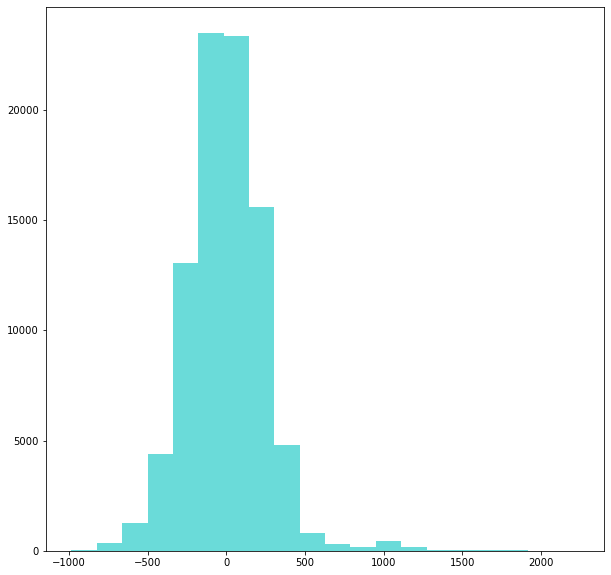

In [201]:
plt.subplots(1,1,figsize=(10,10))
plt.hist(dados.residuo, color='#6ADBD9', bins=20)

##  TESTE

In [198]:
x_test  = st.add_constant(x_test, True)
drops_ ={
    
   'CALCAMENTO_Parcial',
    'MESORREGIAO_MES2',
    'CALCAMENTO_Total',
   'QTD_DORM_FAM',
    'DESTINO_LIXO_É_coletado_diretamente',
   'ABASTECIMENTO_Demais',
   'COR_IAP',
     'DESTINO_LIXO_É_coletado_indiretamente',
   "MESORREGIAO_MES8",
   "UF_Maranhão",
   'UF_Piauí',
   'UF_Paraíba',
   'UF_Ceará',
   'UF_Rio_Grande_do_Norte',
   'UF_Sergipe',
    "AGUA_ENCANADA_Sim",
   #---------------------------- por vif 
   'TEM_BANHEIRO_Sim',# inf
   'ESCOAMENTO_SANITARIO_Não_identificado',# inf 
   #----------------------------- p valor 
   'ESCOAMENTO_SANITARIO_Outro_Meio'
}
x_test = x_test.drop(columns=drops_)


In [199]:
mean_absolute_error(y_test, model.predict(x_test))

186.3108065894818

In [200]:
mean_absolute_error(y_test, model.predict(x_test))

186.3108065894818